# Data analysis

Simple descriptive statistics of each question in the survey

In [1]:
#LOAD LIBRARIES

import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt

import regex as re

import seaborn as sns

import numpy as np


from IPython.display import display, HTML




#plot in ggplot
import plotnine as p9

from plotnine import *
from plotnine import data


from plotnine import (
    ggplot,
    aes,
    geom_bar,
    coord_flip,
    theme_classic
)


#plotting likert items
import plot_likert



#### IMPORT FUNCTIONS

from Functions import getColumns

from Functions import create4colDF

from Functions import createMULTIcolDF

from Functions import answersNOTQ9

from Functions import reorder



In [2]:
# %%LOAD FILES

#WRANGLED DATA
fileName = "Data/Wrangled.csv"

df = pd.read_csv(fileName) #read new file



#COLLEGE  NAMES

fileName = "Data/CollegeNames.csv"

df_college_names = pd.read_csv(fileName) #read new file


df_college_names.columns = ["Q3_1", "Full", "Q3_2"]



"""

DATA NOTE
Contains eligible participants who completed at least one question.


"""



'\n\nDATA NOTE\nContains eligible participants who completed at least one question.\n\n\n'

In [3]:
#make a dictionary of college names to be able to put full names into tables

#dict_collegesNames = df_college_names[["Q3_1", "Full"]].drop_duplicates().set_index("Q3_1").to_dict()

dict_collegesNames =pd.Series(df_college_names.Full.values,index=df_college_names.Q3_1).to_dict()


#dict_collegesNames

# DEMOGRAPHICS

In [4]:
#where to save files

root = "Results/Section"

section = "1/"

filePath = root+ section

#filePath

In [5]:
# %% COLLEGES REPRESENTED 

# %%% COLLEGES ONLY

#get college names represented in data set
colleges = df[["Q3_1"]]

colleges = pd.DataFrame(colleges.groupby(["Q3_1"]).size()) #count number represented

colleges.reset_index(inplace=True)

colleges.rename(columns={0: 'Number of participants'}, inplace=True) #rename column


#print(colleges.columns.tolist())


college_names = colleges[["Q3_1"]] #get their names


df_college_namesOnly = df_college_names[["Q3_1"]].drop_duplicates()


merged = df_college_namesOnly.merge(college_names, how='left', indicator=True) #get columns not represented in data
merged = merged.loc[merged["_merge"] == "left_only"]

merged["_merge"]=0 #make value zero as no colleges represented

merged.rename(columns={'_merge': 'Number of participants'}, inplace=True) #rename column

collegesOnly = colleges.append(merged).sort_values(["Q3_1"]) #append to colleges and sort

#has duplicate index values, reset

collegesOnly = collegesOnly.reset_index(drop=True)

#re-order rows
collegesOnly = collegesOnly.reindex([0,1,2,3,4,5,8,9,10,11,12,13,14,15,16,17,6,7])


collegesOnly.reset_index(inplace = True)
collegesOnly = collegesOnly.drop('index', axis=1)

#rename columns
collegesOnly = collegesOnly.rename(columns={'Q3_1': 'Answer'}) 


#add question column
collegesOnly.insert(0,'Question','')


#Add row with "total answered"
collegesOnly.loc[-1] = ["", "Total answered", collegesOnly['Number of participants'].sum(),]

collegesOnly.index = collegesOnly.index + 1

collegesOnly = collegesOnly.sort_index()



#add proportion coumn
eligible = len(df)


collegesOnly['Prop. of participants'] = round(collegesOnly['Number of participants']/eligible, 2)



#Add row with "eligible participants"
collegesOnly.loc[-1] = ["", "Eligible", eligible, ""]

collegesOnly.index = collegesOnly.index + 1

collegesOnly = collegesOnly.sort_index()


#Add row with the question
collegesOnly.loc[-1] = ["Specialty training college", "", "", ""]

collegesOnly.index = collegesOnly.index + 1

collegesOnly = collegesOnly.sort_index()


collegesOnly = collegesOnly.replace({"Answer": dict_collegesNames})


#save results
#saveTo = filePath + "Participants_by_collegeOnly.csv"

#collegesOnly.to_csv(saveTo, index=False)


#collegesOnly

C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\2005513305.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [6]:
# %%% COLLEGES AND SUBSPECIALTIES 

#get college names represented in data set
collegesSub = df[["Q3_1", "Q3_2"]]

collegesSub = pd.DataFrame(collegesSub.groupby(["Q3_1", "Q3_2"]).size()) #count number represented

collegesSub.reset_index(inplace=True)

collegesSub.rename(columns={0: 'Number of participants'}, inplace=True) #rename column

print(collegesSub.columns.tolist())

college_names = collegesSub[["Q3_1", "Q3_2"]] #get their names


merged = df_college_names[["Q3_1", "Q3_2"]].merge(college_names, how='left', indicator=True) #get columns not represented in data
merged = merged.loc[merged["_merge"] == "left_only"]






merged["_merge"]=0 #make value zero as no colleges represented

merged.rename(columns={'_merge': 'Number of participants'}, inplace=True) #rename column

collegesSub = collegesSub.append(merged).sort_values(["Q3_1", "Q3_2"], ascending = (True, True)) #append to colleges and sort


#has duplicate index values, reset
#colleges.index.is_unique

collegesSub = collegesSub.reset_index(drop=True)

#list(range(0,78))

#re-order rows
list1 = ["OTHER", "Prefer not to say"]

collegesSub = collegesSub.sort_values('Q3_1', key=lambda x: x.isin(list1))



collegesSub.reset_index(inplace = True)
collegesSub = collegesSub.drop('index', axis=1)

#rename columns
collegesSub = collegesSub.rename(columns={'Q3_1': 'College', 'Q3_2': 'Subspecialty'}) 



#Add row with "total answered"
collegesSub.loc[-1] = ["Total answered", "",  collegesSub["Number of participants"].sum()]

collegesSub.index = collegesSub.index + 1

collegesSub = collegesSub.sort_index()



#add proportion coumn
eligible = len(df)


collegesSub["Prop. of participants"] = round(collegesSub["Number of participants"]/eligible, 2)


#Add row with "eligible participants"
collegesSub.loc[-1] = ["Eligible", "", eligible, ""]

collegesSub.index = collegesSub.index + 1

collegesSub = collegesSub.sort_index()

#collegesSub




#save results
#saveTo = filePath + "Participants_by_collegeSubspeciality.csv"

#collegesSub.to_csv(saveTo, index=False)



['Q3_1', 'Q3_2', 'Number of participants']


C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\3484333211.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [7]:
#make colleges table for main text
#only top 50% data
collegesOnlyTop = collegesOnly.iloc[3:]

collegesOnlyTop[["Number of participants", "Prop. of participants"]]


collegesOnlyTop["Number of participants"] = collegesOnlyTop["Number of participants"].apply(pd.to_numeric, errors='coerce')
collegesOnlyTop["Prop. of participants"] = collegesOnlyTop["Prop. of participants"].apply(pd.to_numeric, errors='coerce')


collegesOnlyTop = collegesOnlyTop.sort_values("Number of participants",ascending=False)


collegesOnlyTop

#cumulative sum
collegesOnlyTop["CumSum"] = collegesOnlyTop["Prop. of participants"].cumsum()



#which % to look at
top = 0.95

#get the top 95%
collegesOnlyTop95 = collegesOnlyTop[collegesOnlyTop["CumSum"]<=top]


#get the remaining ones

collegesOnlyBot95 = collegesOnlyTop[collegesOnlyTop["CumSum"]>top]


#add the bottom 5% together as "other"
collegesOnlyBot95 = [ "",
                     'Other',
                     #sum rows
                     collegesOnlyTop[collegesOnlyTop["CumSum"]>top]["Number of participants"].sum(),
                     round(collegesOnlyTop[collegesOnlyTop["CumSum"]>top]["Prop. of participants"].sum(),2)
                    ]


#remove cumsum column
collegesOnlyTop95 = collegesOnlyTop95.drop('CumSum', axis=1)

collegesOnlyTop95 = collegesOnlyTop95.reset_index(drop = True)

collegesOnlyTop95.loc[len(collegesOnlyTop95.index)] = collegesOnlyBot95



collegesOnlyMain = collegesOnly.iloc[:3].append(collegesOnlyTop95, ignore_index=True)


collegesOnlyMain['Prop. of participants'] =  collegesOnlyMain['Prop. of participants'].replace(collegesOnlyMain.iloc[1]['Prop. of participants'], 999)
collegesOnlyMain['Prop. of participants'] = (collegesOnlyMain['Prop. of participants']*100).astype(int)
collegesOnlyMain['Prop. of participants']  = collegesOnlyMain['Prop. of participants'] .astype(str) + '%'
collegesOnlyMain['Prop. of participants'] =  collegesOnlyMain['Prop. of participants'].replace(collegesOnlyMain.iloc[1]['Prop. of participants'], "")


#collegesOnlyMain



C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\1725598490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\1725598490.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\1725598490.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [8]:
# %%% TOP 10 COLLEGES

#find the top 10 most common colleges 
collegesTop10 = collegesSub.sort_values('Number of participants', 
                                     ascending=False).head(10)


#create list of top 10 colleges
collegesTop10_namesOnly = collegesTop10[["College",
                                         "Subspecialty"]]

#save results
#saveTo = filePath + "Participants_by_collegeSubspeciality_TOP10.csv"

#collegesTop10.to_csv(saveTo, index=False)



In [9]:
# %%% COMPLETED TRAINING

question = "Completed training"

categories = ["Yes",
               "No"
             ]

column = "Q1"

data = "all"

#number of participants who were eligible to answer the question
#all participants were eligible to answer this question
eligible = len(df)

#print("length df", eligible)


df_completedTraining = answersNOTQ9 (df,
              question,
              column,
              categories,
              eligible,
              data)



#print ("***********************************")
#print("Have you finished your specialty training?")
#print(df_completedTraining)


# YEAR COMPLETED TRAINING


question = "Year training was completed"

#get list of years
categories = df["Q2"].unique()
categories.sort()

categories = categories[:-1]

column = "Q2"

data = "all"

#number of participants who were eligible to answer the question
#all participants who had finished training were eligible for this question
eligible = len(df[df["Q1"]=="Yes"])


df_yearCompletedTraining = answersNOTQ9 (df,
                                          question,
                                          column,
                                          categories,
                                          eligible,
                                          data)




#df_yearCompletedTraining

#print ("***********************************")
#print("What year did you complete your most recent specialty training? (e.g. 2019)")
#print(df_yearCompletedTraining)

In [10]:
#completed training for main text
df_completedTrainingMain = df_completedTraining[df_completedTraining["Answer"] != "Yes"].reset_index(drop = True)


#number that responded
totalCompleted = df_completedTrainingMain[df_completedTrainingMain["Answer"] == "Total answered"]["Number of projects"].iloc[0]



# YEAR COMPLETED TRAINING


question = "Year training was completed"

#get list of years
categories = df["Q2"].unique()
categories.sort()

categories = categories[:-1]

column = "Q2"

data = "all"

#number of participants who were eligible to answer the question
#all participants who had finished training were eligible for this question
eligible = len(df)


df_yearCompletedTrainingYes = answersNOTQ9 (df,
                                          question,
                                          column,
                                          categories,
                                          eligible,
                                          data)




df_yearCompletedTrainingYes = df_yearCompletedTrainingYes.iloc[3:]

#change to numeric
df_yearCompletedTrainingYes = df_yearCompletedTrainingYes.apply(pd.to_numeric, errors='coerce')





#created rows for time since training
yearsSince = 2

lessThan2 = [ "",
             'Post training > 2 year ',
             #sum rows
             df_yearCompletedTrainingYes[df_yearCompletedTrainingYes["Answer"]< 2021-yearsSince]["Number of projects"].sum(),
             str(int((round(df_yearCompletedTrainingYes[df_yearCompletedTrainingYes["Answer"]< 2021-yearsSince]["Number of projects"].sum()/totalCompleted,2)*100))) + '%'
                                                                            ]

MoreThan2 = [ "",
             'Post training ≤ 2 year ',
             #sum those who completed <=2 years ago (2020 & 2019) 
             df_yearCompletedTrainingYes[df_yearCompletedTrainingYes["Answer"]>= 2021-yearsSince]["Number of projects"].sum(),
             #sum those who completed <=2 years ago (2020 & 2019) and devide by number who responded
             str(int((round(df_yearCompletedTrainingYes[df_yearCompletedTrainingYes["Answer"]>= 2021-yearsSince]["Number of projects"].sum()/totalCompleted,2)*100))) + '%'
            ]


df_completedTrainingMain.loc[len(df_completedTrainingMain.index)] = MoreThan2
df_completedTrainingMain.loc[len(df_completedTrainingMain.index)] = lessThan2






#df_completedTrainingMain



In [11]:
# %%% COUNTRY AND STATE

#choose columns of interest
cols = ['Q3_1', 'Q3_2', "Q4_1", "Q4_2", "Q6"]

df_1 = df[cols]


#join the country and state columns
df_1['country'] = df_1[["Q4_1", "Q4_2"]].apply(lambda row: ': '.join(row.values.astype(str)), axis=1)



#find counts

question = "Which country and state did you complete/ are completing most of your most recent specialty training in?"

categories = ["Australia: Australian Capital Territory",
               "Australia: New South Wales",
               "Australia: Northern Territory",
               "Australia: Queensland",
               "Australia: South Australia",
               "Australia: Tasmania",
               "Australia: Victoria",
               "Australia: Western Australia",
               "New Zealand: -",
               "Other: -"]

column = "country"

data = "all"

#number of participants who were eligible to answer the question
#all participants were eligible to answer this question
eligible = len(df)

df_country = answersNOTQ9 (df_1,
              question,
              column,
              categories,
              eligible,
              data)


#print ("***********************************")
#print("Which country and state did you complete/ are completing most of your most recent specialty training in?")
#df_country



C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\537478309.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
#store country only

#find counts

question = "Which country and state did you complete/ are completing most of your most recent specialty training in?"

categories = ["Australia",
               "New Zealand",
               "Other"]

column = 'Q4_1'

data = "all"

#number of participants who were eligible to answer the question
#all participants were eligible to answer this question
eligible = len(df_1)

df_countryOnly = answersNOTQ9 (df,
              question,
              column,
              categories,
              eligible,
              data)


#df_countryOnly

In [13]:
# %%% RURALITY

#find counts

question = "In which geographic area did you complete/ are completing most of your most recent specialty training?"

categories = ["Urban",
               "Regional",
               "Rural",
               "Remote"]

column = "Q5"

data = "all"


#number of participants who were eligible to answer the question
#all participants were eligible to answer this question
eligible = len(df)

df_rurality = answersNOTQ9 (df,
              question,
              column,
              categories,
              eligible,
              data
                )

#df_rurality


In [14]:
#location for main table

df_locationMain = df_countryOnly.append(df_rurality.iloc[3:5], ignore_index = True)

RuralRemote = df_rurality.iloc[-2:]
RuralRemote["Prop. of projects"] = (RuralRemote["Prop. of projects"].str.replace('%', '')).astype(int)
RuralRemote = RuralRemote.cumsum().iloc[-1:]
RuralRemote["Prop. of projects"] = RuralRemote["Prop. of projects"].astype(str) + '%'



#add rural and remote together
df_locationMain = df_locationMain.append(RuralRemote, ignore_index = True)

#rename
df_locationMain['Question'][0] = "Location"
df_locationMain['Answer'][8] = "Rural/ Remote"

#df_locationMain

C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\170189041.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\170189041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\170189041.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [15]:
#respondent gender


categories = ["Female", 
              "Male",
              "Prefer not to say",
              "Non-binary"]

eligible = len(df)

df_gender = answersNOTQ9 (df, 
                          "Gender", 
                          'Q0.1e', 
                          categories, 
                          eligible, 
                          projectsOnly = "all")



#df_gender

### Main Text Table

In [16]:
#Small table for main manuscript

#rename columns to allow for merging


collegesOnlyMain.rename(columns={'Number of participants':'Number of projects', 'Prop. of participants':'Prop. of projects'}, inplace=True)



df_demographicsMain = df_gender.append([collegesOnlyMain,
                                       df_completedTrainingMain,
                                       df_locationMain
                                   ]) #append dfs


#rename columns

df_demographicsMain.rename(columns={'Number of projects': 'Number of participants', 'Prop. of projects': 'Prop. of participants'}, inplace=True)


#take values across
df_demographicsMain['Answer']= np.where(df_demographicsMain['Answer']=='', df_demographicsMain['Question'], df_demographicsMain['Answer'])

#remove question column
df_demographicsMain = df_demographicsMain.drop('Question', axis=1) 

#df_demographicsMain

#save results
saveTo = filePath + "Tables/DemographicsMainText.csv"

df_demographicsMain.to_csv(saveTo, index=False)



#df_demographicsMain

C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\1490376510.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [17]:
# %% DETAILED DEMOGRAPHICS TABLE

#rename columns to allow for merging

collegesOnly['Prop. of participants'] =  collegesOnly['Prop. of participants'].replace(collegesOnly.iloc[1]['Prop. of participants'], 999)
collegesOnly['Prop. of participants'] = (collegesOnly['Prop. of participants']*100).astype(int)
collegesOnly['Prop. of participants']  = collegesOnly['Prop. of participants'] .astype(str) + '%'
collegesOnly['Prop. of participants'] =  collegesOnly['Prop. of participants'].replace(collegesOnly.iloc[1]['Prop. of participants'], "")

collegesOnly.rename(columns={'Number of participants': 'Number of projects', 'Prop. of participants': 'Prop. of projects'}, inplace=True)




df_demographics = collegesOnly.append([#df_gender,
                                       #df_completedTraining,
                                       df_yearCompletedTraining,
                                       df_country,
                                       #df_rurality
                                      ]) #append dfs

#rename columns

df_demographics.rename(columns={'Number of projects': 'Number of participants', 'Prop. of projects': 'Prop. of participants'}, inplace=True)







#display(HTML("<h3>Demographic data - detailed<h3>"))
#display(HTML(df_demographics.to_html()))





#take values across
df_demographics['Answer']= np.where(df_demographics['Answer']=='', df_demographics['Question'], df_demographics['Answer'])

#remove question column
df_demographics = df_demographics.drop('Question', axis=1) 



#save results
saveTo = filePath + "Tables/SuppFile/Demographics_SUPP.csv"

df_demographics.to_csv(saveTo, index=False)



C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\1566309711.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


### Projects

In [18]:
# %%% PROJECT COMPLETION 

#find counts

question = "Completed a project"

categories = ["Yes", 
              "In progress", 
              "I plan to", 
              "No"]

column = "Q6"

data = "all"


#number of participants who were eligible to answer the question
#all participants were eligible to answer this question
eligible = len(df)

df_project = answersNOTQ9 (df,
              question,
              column,
              categories,
              eligible,
              data)



In [19]:
# %%% REASON FOR NON-COMPLETION 


"""
Notes: 
    3 participants did not answer question
    
"""


#find counts

question = "Reason for not completing a project"

categories = ["It was not required",
              "I had recognition of prior learning",
              "I completed a PhD instead",
              "I completed a research Masters instead",
              "I completed approved coursework instead",
              "Other:"] 


column = "Q11"

data = "all"


#number of participants who were eligible to answer the question
#all participants who did NOT complete a project as part of thier training were eligible to answer this question
eligible = len(df[df["Q6"]=="No"])

df_projectNotCompleted = answersNOTQ9 (df,
              question,
              column,
              categories,
              eligible,
              data)


#df_projectNotCompleted

### Reason for Non-completion

In [20]:
# %% DEMOGRAPHICS TABLE

#rename columns to allow for merging



df_projectCompletionMain =  df_project.append([
                                       df_projectNotCompleted]) #append dfs

#rename columns

df_projectCompletionMain.rename(columns={'Number of projects': 'Number of participants', 'Prop. of projects': 'Prop. of participants'}, inplace=True)





#take values across
df_projectCompletionMain['Answer']= np.where(df_projectCompletionMain['Answer']=='', df_projectCompletionMain['Question'], df_projectCompletionMain['Answer'])

#remove question column
df_projectCompletionMain = df_projectCompletionMain.drop('Question', axis=1) 

df_projectCompletionMain

#save results
saveTo = filePath + "Tables/CompletedProjectsMainText.csv"

df_projectCompletionMain.to_csv(saveTo, index=False)



C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\817236304.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


### Project Numbers

,What,Number,Number of participants who responded (prop. responded)
0,Total number of projects conducted by trainees,267.0,174 (0.98)
1,"Number of projects conduted by a single trainee, mode (max)",1.0 (8.0),
2,Total number of projects uploaded by trainees,29.0,24.0 (0.14)
3,Max number of projects uploaded by a single trainee,4,


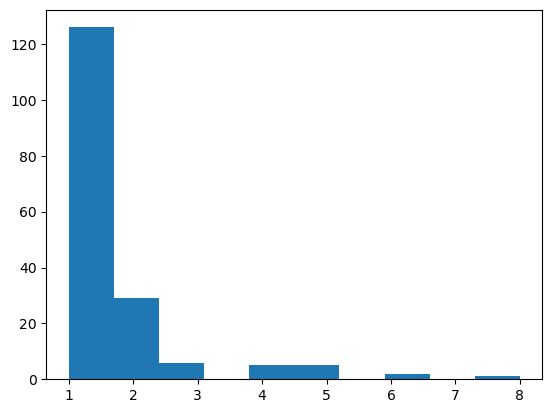

In [21]:
#number of participants who were eligible to answer the question
#participants who have already finished their project were eligible for this question
eligible = len(df[df["Q6"]=="Yes"])


#convert to numeric
df.Q8 = df.Q8.apply(pd.to_numeric, errors='coerce')
df.Q8.dtypes




### Total number of projects in data set

projects_total = df.Q8.sum()


#find number of missing asnwers

projects_totalResponded = df.Q8.notnull().sum()


#print ("***********************************")
#print("NUMBER OF PROJECTS")
#print(projects_total)


### Number of projects per trainee

projects_max = df.Q8.max()

#print ("***********************************")
#print("MAX NUMBER OF PROJECTS PER TRAINEE")
#print(projects_max)


projects_mode = df.Q8.mode()[0]
#print ("***********************************")
#print("MODE NUMBER OF PROJECTS PER TRAINEE")
#print(projects_mode)



#create df of project numbers

question = "Project Numbers"

newCol = [" "] * 2
newCol[0] = question


newCol_2 = ["Total number of projects",
            "Mode of projects per trainee (max)"]


newCol_3 = [projects_total,
            str(projects_mode) + " (" + str(projects_max ) +")"
    ]


df_projectNumbers = pd.DataFrame({"Question": newCol,
                     "Answer": newCol_2,
                     'Number of participants': newCol_3
                     })



### Number of projects uploaded

#get list of headings
headings = list(df)


#find the max number of projects submitted
r = re.compile("^\d+\_Q9a_Id")
newlist = list(filter(r.match, headings)) # Read Note below

numbers = []

for i in newlist:
    i = int(i.split('_', 1)[0].replace('.', '').upper())
    numbers.append(i)


max_projects_uploaded = max(numbers)

#number of participants who did NOT upload a project

#print("***********************************")
#print ("MAX NUMBER OF PROJECTS UPLOADED:")
#print (max_projects_uploaded)


#choose questions of interest
questions = getColumns("a_Id", max_projects_uploaded)


df_projects = df[questions]

df_projectsLong = pd.melt(df_projects)


projectsUploaded = df_projectsLong.value.sum()


#find number of missing asnwers

projects_uploadResponded = df["1_Q9a_Id"].sum()


#print("***********************************")
#print ("TOTAL NUMBER OF PROJECTS UPLOADED:")
#print (projectsUploaded)


#### Create table for saving

#data
data = [['Total number of projects conducted by trainees', projects_total, str(projects_totalResponded) + " (" + str((projects_totalResponded/eligible).round(2)) + ")"],
        ['Number of projects conduted by a single trainee, mode (max)', str(projects_mode) + " (" + str(projects_max) + ")", ""],
        ['Total number of projects uploaded by trainees', projectsUploaded, str(projects_uploadResponded) + " (" + str((projects_uploadResponded/eligible).round(2)) + ")"], 
        ['Max number of projects uploaded by a single trainee', max_projects_uploaded,""]]


# Create the pandas DataFrame
df_projectUploads = pd.DataFrame(data, 
                                 columns = ['What', 'Number', "Number of participants who responded (prop. responded)"])

#save results

#saveTo = filePath + "ProjectUploads.csv"

#df_projectUploads.to_csv(saveTo, index=False)



display(HTML("<h4>High level info on uploaded projects<h4>"))
display(HTML(df_projectUploads.to_html()))




#### plot number of projects
display(HTML("<h4>Distribution of the number of projects conducted by each trainee<h4>"))
d = df.Q8

plt.hist(d)
plt.show()


#print(df.Q8.value_counts())



In [22]:
project_numbersCounts =  df.Q8.value_counts().reset_index()

project_numbersCounts["% respondants"] =  round(project_numbersCounts.Q8/project_numbersCounts.Q8.sum()*100, 0)

project_numbersCounts

,index,Q8,% respondants
0,1.0,126,72.0
1,2.0,29,17.0
2,3.0,6,3.0
3,4.0,5,3.0
4,5.0,5,3.0
5,6.0,2,1.0
6,8.0,1,1.0


In [23]:
eligible = len(df[df["Q6"]=="Yes"])

eligible

177

# SECTION 1

## TRAINEES WHO HAVE COMPLETED A PROJECT

In [24]:
#create an empy df for saving list of dfs to

data = []

### Demographics

In [25]:
#create college order
college_names = colleges[["Q3_1"]] #get their names


df_college_namesOnly = df_college_names[["Q3_1"]].drop_duplicates()


merged = df_college_namesOnly.merge(college_names, how='left', indicator=True) #get columns not represented in data
merged = merged.loc[merged["_merge"] == "left_only"]

merged["_merge"]=0 #make value zero as no colleges represented

merged.rename(columns={'_merge': 'Number of participants'}, inplace=True) #rename column

collegesOnlyProject = colleges.append(merged).sort_values(["Q3_1"]) #append to colleges and sort

#has duplicate index values, reset
collegesOnlyProject = collegesOnlyProject.reset_index(drop=True)

#reorder rows - put "other" at the end
#sort alphabetically
order = collegesOnlyProject["Q3_1"].tolist()

order.remove("OTHER")
order.append("OTHER")

order.remove('Prefer not to say')

#order

C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\4036072659.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [26]:
# %% COLLEGES REPRESENTED 

completedProject = df[df["Q6"]=="Yes"]


#copy Q3_1 to a new column
completedProject["Colleges"] = completedProject["Q3_1"] 


#find counts for those who completed a project

question = "Colleges that said they have completed a project"

categories = order

column = 'Colleges'

what = "all"

#number of participants who were eligible to answer the question
#all participants were eligible to answer this question
eligible = len(df[df["Q6"]=="Yes"])

df_collegesOnly = answersNOTQ9 (completedProject,
              question,
              column,
              categories,
              eligible,
              what)


#df_collegesOnly

C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\835443454.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
#find counts for those who completed a project

q9Data = df[~df["1_Q9b"].isnull()]

question = "Colleges that gave project data"

categories = order

#copy Q31 to a new column
q9Data["Colleges"] = q9Data['Q3_1']

column = 'Colleges'

what = "all"

#number of participants who were eligible to answer the question
#all participants were eligible to answer this question
eligible = len(df[df["Q6"]=="Yes"])

df_collegesOnlyProject = answersNOTQ9 (q9Data,
              question,
              column,
              categories,
              eligible,
              what)


#df_collegesOnlyProject

C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\1068330428.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
#merge the two tables

# rename column names so its clear

df_collegesOnly.rename(columns={'Number of projects': 'Number of participants (All survey respondents)', 'Prop. of projects': 'Prop. of participants (All survey respondents)'}, inplace=True)

df_collegesOnlyProject.rename(columns={'Number of projects': 'Number of participants (Gave project data)', 'Prop. of projects': 'Prop. of participants (Gave project data)'}, inplace=True)





#display results
display(HTML("<h4>Comparison between all survey respondents and those that gave project data<h4>"))
display(HTML("<p>These are not significantly different from the rest of the survey population.  <p>"))
pd.concat([df_collegesOnly,df_collegesOnlyProject.drop(["Question","Answer"], axis=1)], axis=1)

,Question,Answer,Number of participants (All survey respondents),Prop. of participants (All survey respondents),Number of participants (Gave project data),Prop. of participants (Gave project data)
0,Colleges that said they have completed a project,,,,,
1,,Eligible,177.0,,177.0,
2,,Total answered,177.0,100% *,79.0,45% *
3,,ACD,3.0,2%,0.0,0%
4,,ACEM,5.0,3%,2.0,3%
5,,ACRRM,0.0,0%,0.0,0%
6,,ACSEP,3.0,2%,2.0,3%
7,,ANZCA,46.0,26%,18.0,23%
8,,CICM,14.0,8%,11.0,14%
9,,RACDS,1.0,1%,1.0,1%


#### Comparison to rest of survey
Compare those who completed this section to the others

In [29]:
#if participants completed 1_Q9b they gave data for at least one project
newlist = ["1_Q9b"] # Read Note below



#add Q3 to the list and Q
cols = ["Q3_1","Q3_2", "Q12", "Q14c", "Q16", "1_Q9b"]

#get df with just Q9 (gave project data) of the survey
df_ProjectData_all = df.loc[:, cols]

df_ProjectData_all.head()


df_ProjectData_did = df_ProjectData_all.dropna(subset=newlist)

#add column to say that the PREQ was done
df_ProjectData_did["ProjectData"] = "Yes"

#df_ProjectData_did

C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\782915069.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
#find the difference between those that did PREQ and did not
df_ProjectData_NotDone = pd.concat([df_ProjectData_did, df_ProjectData_all]) #merge dfs
df_ProjectData_NotDone.reset_index(inplace = True) #reset index
df_ProjectData_NotDone = df_ProjectData_NotDone.drop_duplicates(subset= ["index"], keep=False) #remove the same index

#add column to say that the PREQ was not done
df_ProjectData_NotDone["ProjectData"] = "No" 

#remove index column
df_ProjectData_NotDone = df_ProjectData_NotDone.drop('index', axis=1)




In [31]:
df_ProjectData_compare = pd.concat([df_ProjectData_did, df_ProjectData_NotDone]) #merge dfs

#df_ProjectData_compare

In [32]:
#SUPPORT OF PROJECTS 

#count the numbers for each categofy (supportive or not to projects)
df_ProjectData_compareCounts = df_ProjectData_compare.groupby(["ProjectData", "Q12"])['Q12'].count().to_frame()

#make into df
df_ProjectData_compareCounts.columns = ["Count"] #change column name
df_ProjectData_compareCounts.reset_index(inplace=True) #reset index

#df_ProjectData_compareCounts


In [33]:

#Chi Sq test: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
#pivot table

df_ProjectData_compareCountsPiv = pd.pivot(df_ProjectData_compareCounts, index='ProjectData', columns='Q12', values='Count')


from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df_ProjectData_compareCountsPiv)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0) - those that provided data were NOT significantly different in supporting projects to those that did not')
else:
    print('Independent (H0 holds true) - those that provided data WERE significantly different in supporting projects to those that did not')
 

p value is 6.17074639184489e-05
Dependent (reject H0) - those that provided data were NOT significantly different in supporting projects to those that did not


### Question Generation

In [34]:
# %%% QUESTION GENERATION
#find number eligible to answer the question
# in this case it is the number of projects conducted
eligible = projects_total



categories = ["On my own",
              "It was a component of an ongoing project - e.g. part of a grant, one of the department priority area projects, etc ",
              "A result of a clinical discussion- e.g. recommended by my supervisor after a clinical meeting.",
              "Other"]


df_projectsQuestion = create4colDF(df,
                                   "b", 
                                   "Which best describes the circumstances in which you generated your research question?",
                                   categories,
                                   eligible)





data.append(df_projectsQuestion)



#save results

#saveTo = filePath + "Projects_QuestionGeneration.csv"

#df_projectsQuestion.to_csv(saveTo, index=False)


#df_projectsQuestion

### Conduct of SR

In [35]:
# %%% SYSTEMATIC REVIEW CONDUCTED

#find number eligible to answer the question
# in this case it is the number of projects conducted
eligible = projects_total

categories = ["Yes",
              "No"]


df_projectsSR = create4colDF(df,
                             "c", 
                             "Before starting your project, did you search for a systematic review or other type of review (e.g. scoping review) that answered your question prior to starting your research?",
                             categories,
                             eligible)


data.append(df_projectsSR)


#save results
#saveTo = filePath + "Projects_SR.csv"

#df_projectsSR.to_csv(saveTo, index=False)



#df_projectsSR



### Protocol developed

In [36]:
# %%% PROTOCOL DEVELOPED

#find number eligible to answer the question
# in this case it is the number of projects conducted
eligible = projects_total


categories= ["On my own without or with minimal input from others.",
             "On my own but with significant input from others.",
             "The protocol was part of an existing project"]


df_projectsStudyDesign = create4colDF(df,
                                      "d",
                                      "Which best describes the circumstances in which you generated your study design?",
                                      categories,
                                      eligible)


#data.append(df_projectsStudyDesign)



#save results
#saveTo = filePath + "Projects_StudyDesign.csv"

#df_projectsStudyDesign.to_csv(saveTo, index=False)

#df_projectsStudyDesign

In [37]:
# %%% PROTOCOL DEVLOPED APRIORI

#find number eligible to answer the question
# in this case it is the number of projects conducted
eligible = projects_total





categories = ["Yes - I developed one myself",
              "Yes - there one already developed",
              "No"]

df_projectsProtocolApriori = create4colDF(df,
                                   "e", 
                             "Before starting data collection for this project, did you develop research protocol?",
                             categories,
                             eligible)



data.append(df_projectsProtocolApriori)

#df_projectsProtocolApriori

In [38]:
# %%%% PROTOCOL REGISTERED


#find number eligible to answer the question
# in this case it is the number of projects that had a protocol apriori
#Survey logic was not set up correctly meaning that those that responded "Yes - there one already developed" did not see this question.
eligible = df_projectsProtocolApriori[(df_projectsProtocolApriori["Answer"]=="Yes - I developed one myself")]['Number of projects'].sum()


categories = ["Yes - Published in a journal",
              "Yes - in a registry (e.g. PROSPERO, ClinicalTrials.gov, OSF, etc):",
              "Yes - Other. Please state where:",
              "No "]



df_projectsProtocolRegistered = createMULTIcolDF(df,
                                                 "f",
                                                 "Was the protocol registered in a publicly available place?**",
                                               #  categories,
                                                 r'(.*),(?=Yes)',
                                                 categories,
                                                 eligible
                                                 )






#find number of projects that have been registered in 1 or more places

df_projectsProtocolRegistered_times= createMULTIcolDF(df,
                                   "f",
                                                 "Was the protocol registered in a publicly available place?",
                                                 r'(.*),(?=Yes)',
                                                 categories,
                                                 eligible,
                                                 1,
                                                 'Number of places registered') #1 = spits out df earlier, see function above



#save results
#saveTo = filePath + "ProtocolsRegistered.csv"

#df_projectsProtocolRegistered_times.to_csv(saveTo, index=False)




data.append(df_projectsProtocolRegistered)

#df_projectsProtocolRegistered



C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will

In [39]:
#display results
display(HTML("<h4>Number of places protocols were registered<h4>"))
#display(HTML("<p>These are not significantly different from the rest of the survey population.  <p>"))

display(HTML(df_projectsProtocolRegistered_times.to_html()))



,Number of places registered,Number of projects
0,0,40
0,1,19
1,2,1


### Consumer Involvement

In [40]:
# %%% CONSUMER INVOLVEMENT
#find number eligible to answer the question
# in this case it is the number of projects conducted
eligible = projects_total


categories = ["Yes",
              "No"]




df_projectsConsumer = create4colDF(df,
                                   "g", 
                             "Were consumers involved in the design of your research?",
                             categories,
                             eligible)



data.append(df_projectsConsumer)


#save results

#saveTo = filePath + "Projects_QuestionConsumer.csv"

#df_projectsConsumer.to_csv(saveTo, index=False)




In [41]:
# %%%% CONSUMERS - What aspect

#find number eligible to answer the question
# in this case it is the number of projects that involved consumers
eligible = df_projectsConsumer[df_projectsConsumer["Answer"]=="Yes"]['Number of projects'].sum()


categories = ["Developing the research question",
              "Protocol design",
              "Conduct of research",
              "Dissemination of research",
              "Future work including implementation of research findings and/or developing future research questions"]



df_projectsConsumer_aspect = createMULTIcolDF(df,
                                              "h",
                                              "Which part of the research process the consumers were involved in?",
                                              r",",
                                              categories,
                                              eligible)


#save results

#saveTo = filePath + "Projects_QuestionConsumer_aspect.csv"

#df_projectsConsumer_aspect.to_csv(saveTo, index=False)




#find number of projects that have been registered in 1 or more places
df_projectsConsumer_aspect_times= createMULTIcolDF(df,
                                   "h",
                                                 "Which part of the research process the consumers were involved in?",
                                                r",",
                                              categories,
                                              eligible,
                                                 1,
                                                 'Number of aspects consumers were involved in') #1 = spits out df earlier, see function above



#save results

#saveTo = filePath + "ConsumerInvolvement_AspectTimes.csv"

#df_projectsConsumer_aspect_times.to_csv(saveTo, index=False)





data.append(df_projectsConsumer_aspect)

C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:550: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [42]:
#display results
display(HTML("<h4>Number of aspects consumers were involved in <h4>"))
display(HTML("<p>Number of aspects of the project consumers were involved in per project<p>"))

display(HTML(df_projectsConsumer_aspect_times.to_html()))


,Number of aspects consumers were involved in,Number of projects
0,0,0
0,1,3
1,2,2
2,4,1
3,3,1


In [43]:
# %%%% CONSUMERS - Level of involvement

#find number eligible to answer the question
# in this case it is the number of projects that involved consumers
eligible = df_projectsConsumer[df_projectsConsumer["Answer"]=="Yes"]['Number of projects'].sum()


categories = ["Consultation",
              "Co-investigator/collaborator",
              "Lead"]



df_projectsConsumer_level = create4colDF(df,
                                   "i", 
                             "Which part of the research process the consumers were involved in?",
                             categories,
                             eligible)



data.append(df_projectsConsumer_level)

### Over profesionals involvement

In [44]:
# %%% OTHER PROFESSIONAL INVOLVEMENT - THE TEAM

#find number eligible to answer the question
# in this case it is the number of projects conducted
eligible = projects_total


categories = ["Yes - Medical professional(s) from a different specialty. Please specify:",
              "Yes - Allied Health Professional(s). Please specify:",
              "Yes - Nursing staff. ",
              "Yes -Statistician(s).",
              "Yes - Health economist(s).",
              "Yes - Librarian(s)/ Information Specialist(s).",
              "Yes - Data scientist(s).",
              "Yes - Other. Please specify:",
              "No"]


df_projectsOthersInvolved = createMULTIcolDF(df,
                                             "j",
                                             "Did your research team consist of members outside of your own profession?",
                                             r',',
                                             categories,
                                             eligible)



#save results
#saveTo = filePath + "Projects_Others Involved.csv"

#df_projectsOthersInvolved.to_csv(saveTo, index=False)






#find number of projects that involved in 1 or more people

df_projectsOthersInvolved_times= createMULTIcolDF(df,
                                                  "j",
                                                  "Did your research team consist of members outside of your own profession?",
                                                  r',',
                                                categories,
                                                eligible,
                                                1,
                                                "Number of other professionals involved") #1 = spits out df earlier, see function above


df_projectsOthersInvolved_times = df_projectsOthersInvolved_times.sort_values(by = "Number of other professionals involved")


#save results

#saveTo = filePath + "OtherProfessionalInvolvement.csv"

#df_projectsOthersInvolved_times.to_csv(saveTo, index=False)


data.append(df_projectsOthersInvolved)




C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will

In [45]:
df_projectsOthersInvolved_times["Prop. of projects"] = round(df_projectsOthersInvolved_times["Number of projects"]/90, 2)



#display results
display(HTML("<h4>Team member numbers <h4>"))
display(HTML("<p>Number of team members of other specialties/professions involved in each project<p>"))

display(HTML("Number eligible to respond: {}".format(eligible)))
display(HTML("Number of projects we got responses for: 90"))

display(HTML(df_projectsOthersInvolved_times.to_html()))

,Number of other professionals involved,Number of projects,Prop. of projects
0,0,39,0.43
0,1,40,0.44
2,2,4,0.04
1,3,5,0.06
4,4,1,0.01
3,5,1,0.01


### Dissemination

In [46]:
# %%% PRESENTED LOCALLY

#find number eligible to answer the question
# in this case it is the number of projects conducted
eligible = projects_total


categories = ["Yes",
              "No"]

df_projectsLocalPresent = create4colDF(df,
                                   "k", 
                             "Were the results of your study presented to the department where are doing or did your clinical training?",
                             categories,
                             eligible)



data.append(df_projectsLocalPresent)


#save results
#saveTo = filePath + "Presented Locally.csv"

#df_projectsLocalPresent.to_csv(saveTo, index=False)





In [47]:
#### Publically available 
#find number eligible to answer the question
# in this case it is the number of projects conducted
eligible = projects_total


categories = ["Yes - Published in a journal by the end of your training ",
              "Yes - Subsequently published in a journal",
              "Yes - Pre-print available",
              "No - It is unpublished"]


df_projectsResultsPublic = create4colDF(df,
                                        "n",
                                        "Is a manuscript containing the results publicly available?",
                                        categories,
                                        eligible)



data.append(df_projectsResultsPublic)

#save results

#saveTo = filePath + "Results Public.csv"

#df_projectsResultsPublic.to_csv(saveTo, index=False)




### Utility

In [48]:
#### How useful were the 


#find number eligible to answer the question
# in this case it is the number of projects conducted
eligible = projects_total


categories = ["Yes",
              "No"]

df_projectsUseful = create4colDF(df,
                                 "l",
                                 "Do you or your colleagues believe that the results of this study may be useful in practice?", 
                                 categories,
                                eligible)



data.append(df_projectsUseful)




#### Confidence in results
#find number eligible to answer the question
# in this case it is the number of projects conducted
eligible = projects_total


categories = ["Very confident",
              "Somewhat confident ",
              "Not at all confident "]


df_projectsConfidence = create4colDF(df,
                                     "m",
                                "How confident are you in using the findings of your study in clinical practice?",
                                categories,
                                eligible)


data.append(df_projectsConfidence)

#save results
#saveTo = filePath + "Results Confidence.csv"
#df_projectsConfidence.to_csv(saveTo, index=False)






### Authorship

In [49]:
# %%% AUTHOR POSITION

#find number eligible to answer the question
# in this case it is the number of projects that were published
eligible = df_projectsResultsPublic[(df_projectsResultsPublic["Answer"] == "Yes - Published in a journal by the end of your training ")|
                                    (df_projectsResultsPublic["Answer"] == "Yes - Subsequently published in a journal")]["Number of projects"].sum()


categories = ["First ",
              "Second",
              "Last",
              "Other"]

df_projectsAuthorPos = create4colDF(df,
                                    "p",
                                    "Which author position did you have for this publication?",
                                    categories,
                                    eligible)



data.append(df_projectsAuthorPos)

### Time spend on project

In [50]:
headings = list(df)
            
        
col = "q"

#find the max number of projects that had the question answered
r = re.compile("^\d+\_Q9" + col + "\_\d+$")

newlist = list(filter(r.match, headings)) # Read Note below
 
numbers = []

for i in newlist:
     i = int(i.split('_', 1)[0].replace('.', '').upper())
     numbers.append(i)
     
     
numberCols = max(numbers)

#remove duplicate numbers
numbers = list(set(numbers))

#choose questions of interest
questions1 = getColumns(col, numberCols) #CHANGE TO NUMBER

#Q9q has _1 _2 and _3 - need to create df with all of these

questions = [] #create empy df
values = [1,2,4] #3 values that are needed

for i in numbers:
    
    for j in values:
        
        questions.append((str(questions1[i-1]) + "_" + str(j)))

#get question that appear in the dataset
questions = list(set(headings) & set(questions))

questions.sort()

#get those who completed a project
df_1 = df[df.Q6 == "Yes"][["Q3_1","Q3_2"]+ questions]

#CHANGE FROM WIDE TO LONG DATA
#extract columns 1_, 2_ etc 

#print(questions)




#PROJECT 1
df_1_1 = df_1[["Q3_1","Q3_2"]+questions[0:3]]


#rename columns
df_1_1.rename(columns={'1_Q9q_1': '1', 
                       '1_Q9q_2': '2',
                       '1_Q9q_4': '4'}, inplace=True)

#remove nulls
df_1_1 = df_1_1.dropna(axis=0, how='all',subset=['1',
                                                 '2',
                                                 '4'])

#PROJECT 2
df_1_2 = df_1[["Q3_1","Q3_2"]+questions[3:6]]     


#rename columns
df_1_2.rename(columns={'2_Q9q_1': '1', 
                       '2_Q9q_2': '2',
                       '2_Q9q_4': '4'}, inplace=True)

#remove nulls
df_1_2 = df_1_2.dropna(axis=0, how='all',subset=['1',
                                                 '2',
                                                 '4'])


#PROJECT 3
df_1_3 = df_1[["Q3_1","Q3_2"]+questions[6:9]]


#rename columns
df_1_3.rename(columns={'3_Q9q_1': '1', 
                       '3_Q9q_2': '2',
                       '3_Q9q_4': '4'}, inplace=True)

#remove nulls
df_1_3 = df_1_3.dropna(axis=0, how='all',subset=['1',
                                                 '2',
                                                 '4'])



#PROJECT 4

df_1_4 = df_1[["Q3_1","Q3_2"]+questions[9:]]



#rename columns
df_1_4.rename(columns={'4_Q9q_1': '1', 
                       '4_Q9q_2': '2',
                       '4_Q9q_4': '4'}, inplace=True)

#remove nulls
df_1_4 = df_1_4.dropna(axis=0, how='all',subset=['1',
                                                 '2',
                                                 '4'])


#Put columns together

df_projectsTimeSpent = pd.concat([df_1_1, df_1_2, df_1_3, df_1_4])

df_projectsTimeSpent = df_projectsTimeSpent.reset_index(drop=True)

#add sum of time

df_projectsTimeSpent["sum"] = df_projectsTimeSpent[['1',
                                                 '2',
                                                 '4']].sum(axis=1)


#normalise columns as they the sum isn't perfect
                                                 
df_projectsTimeSpent["1_norm"] = (df_projectsTimeSpent["1"]/df_projectsTimeSpent["sum"] * 100).round(0)


df_projectsTimeSpent["2_norm"] = (df_projectsTimeSpent["2"]/df_projectsTimeSpent["sum"] * 100).round(0)


df_projectsTimeSpent["4_norm"] = (df_projectsTimeSpent["4"]/df_projectsTimeSpent["sum"] * 100).round(0)


df_projectsTimeSpent["sum_norm"] = df_projectsTimeSpent[['1_norm',
                                                 '2_norm',
                                                 '4_norm']].sum(axis=1)


#rename columns
df_projectsTimeSpent.rename(columns={'1_norm': 'During scheduled service/clinical work time', 
                       '2_norm': 'During protected time - e.g. grant funded time, time allocated for research, etc?',
                       '4_norm': 'In your own time',
                       'Q3_1': "College",
                       "Q3_2": "Subspecialty"}, inplace=True)


print("number of projects in the dataset re time spent on projects:", len(df_projectsTimeSpent))



number of projects in the dataset re time spent on projects: 85


C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\3644181218.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\3644181218.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\3644181218.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\3644181218.py:105: SettingWithCopyWarning

In [51]:
#Overall average
overallTime = df_projectsTimeSpent[["During scheduled service/clinical work time",
                     "During protected time - e.g. grant funded time, time allocated for research, etc?",
                     "In your own time"]].describe().transpose()


overallTime["IQR"] = overallTime["25%"].astype(int).astype(str) + " - "+ overallTime["75%"].astype(int).astype(str)

##########stats for CLINICAL TIME
clinicalTime = df_projectsTimeSpent.groupby(df_projectsTimeSpent.College)["During scheduled service/clinical work time"].describe()[["count","25%", "50%", "75%"]]

#make IQR column
clinicalTime["IQR"] = clinicalTime["25%"].astype(int).astype(str) + " - "+ clinicalTime["75%"].astype(int).astype(str)


#remove unwanted columns
clinicalTime = clinicalTime[["count", "50%", "IQR" ]]

#add overall row

clinicalTime.loc[len(clinicalTime.index)] = overallTime.iloc[0][["count", "50%", "IQR" ]]

clinicalTime.rename(index = {12: 'Overall'}, inplace = True)


#rename columns
clinicalTime.rename(columns={"50%": 'median (Clinical time)',
                              "IQR": 'IQR (Clinical time)'
                             }, inplace=True)



##########stats for PROTECTED TIME
protectedTime = df_projectsTimeSpent.groupby(df_projectsTimeSpent.College)["During protected time - e.g. grant funded time, time allocated for research, etc?"].describe()[["25%", "50%", "75%"]]

#make IQR column
protectedTime["IQR"] = protectedTime["25%"].astype(int).astype(str) + " - "+ protectedTime["75%"].astype(int).astype(str)


#remove unwanted columns
protectedTime = protectedTime[["50%", "IQR" ]]



#add overall row

protectedTime.loc[len(protectedTime.index)] = overallTime.iloc[1][["50%", "IQR" ]]

protectedTime.rename(index = {12: 'Overall'}, inplace = True)


#rename columns
protectedTime.rename(columns={"50%": 'median (Protected time)',
                              "IQR": 'IQR (Protected time)'
                             }, inplace=True)


##########stats for OWN TIME
ownTime = df_projectsTimeSpent.groupby(df_projectsTimeSpent.College)["In your own time"].describe()[["25%", "50%", "75%"]]

#make IQR column
ownTime["IQR"] = ownTime["25%"].astype(int).astype(str) + " - "+ ownTime["75%"].astype(int).astype(str)


#remove unwanted columns
ownTime = ownTime[["50%", "IQR" ]]


#add overall row

ownTime.loc[len(ownTime.index)] = overallTime.iloc[2][["50%", "IQR" ]]

ownTime.rename(index = {12: 'Overall'}, inplace = True)


#rename columns
ownTime.rename(columns={"50%": 'median (Own time)',
                              "IQR": 'IQR (Own time)'
                             }, inplace=True)



#merge df
df_projectsTimeSpent_Stats = pd.concat([clinicalTime, protectedTime, ownTime], axis=1)


df_projectsTimeSpent_Stats["count"] = df_projectsTimeSpent_Stats["count"].astype(int)
#df_projectsTimeSpent_Stats["median (Clinical time)"] = df_projectsTimeSpent_Stats["count"].astype(int)
#df_projectsTimeSpent_Stats["median (Protected time)"] = df_projectsTimeSpent_Stats["count"].astype(int)
#df_projectsTimeSpent_Stats["median (Own time)"] = df_projectsTimeSpent_Stats["count"].astype(int)



In [52]:

#formatting - https://www.analyticsvidhya.com/blog/2021/06/style-your-pandas-dataframe-and-make-it-stunning/#:~:text=You%20can%20store%20all%20the,parameter%20should%20be%20%E2%80%9Copenpyxl%E2%80%9D.
#highlight MAX
#2 dp
#save

#save results
saveTo = filePath + "Tables/TimeSpendOnProjects.xlsx"


df_formatedTimeSpent= df_projectsTimeSpent_Stats.style.highlight_max(color='#fee0d2',
                                        axis = 1,
                                       subset = ["median (Clinical time)",
                                                "median (Protected time)",
                                                "median (Own time)"] ).set_precision(0)




df_formatedTimeSpent.to_excel(saveTo, engine='openpyxl')


df_formatedTimeSpent


C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\2875178968.py:14: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,count,median (Clinical time),IQR (Clinical time),median (Protected time),IQR (Protected time),median (Own time),IQR (Own time)
College,,,,,,,
ACEM,2,5,2 - 7,5,2 - 7,90,90 - 90
ACSEP,2,28,24 - 32,16,7 - 23,56,44 - 68
ANZCA,20,7,3 - 16,0,0 - 1,90,71 - 95
CICM,10,4,0 - 5,0,0 - 3,92,89 - 98
RACDS,2,25,25 - 25,0,0 - 0,75,75 - 75
RACGP,3,5,2 - 6,85,80 - 89,10,8 - 14
RACP,14,8,0 - 10,6,0 - 20,81,71 - 94
RACS,8,5,4 - 16,2,0 - 27,86,53 - 95
RANZCOG,1,0,0 - 0,0,0 - 0,100,100 - 100


In [53]:
#Who had duplicate responses
headings = list(df)
            
        
col = "q"

#find the max number of projects that had the question answered
r = re.compile("^\d+\_Q9" + col + "\_\d+$")

newlist = list(filter(r.match, headings)) # Read Note below
 
numbers = []

for i in newlist:
     i = int(i.split('_', 1)[0].replace('.', '').upper())
     numbers.append(i)
     
     
numberCols = max(numbers)

#remove duplicate numbers
numbers = list(set(numbers))

#choose questions of interest
questions1 = getColumns(col, numberCols) #CHANGE TO NUMBER

#Q9q has _1 _2 and _3 - need to create df with all of these

questions = [] #create empy df
values = [1,2,4] #3 values that are needed

for i in numbers:
    
    for j in values:
        
        questions.append((str(questions1[i-1]) + "_" + str(j)))

#get question that appear in the dataset
questions = list(set(headings) & set(questions))

questions.sort()

#get those who completed a project
df_1 = df[df.Q6 == "Yes"][["Q3_1"]+ questions]

#give each person a unique number
df_1.reset_index(inplace = True)

#make category rather than number
df_1['index'] = df_1['index'].astype(str)

#go from wide to long
df_1 = df_1[["index","Q3_1", "1_Q9q_1","2_Q9q_1","3_Q9q_1","4_Q9q_1"]] #keep first of each set

df_1 = pd.melt(df_1, id_vars=['index',"Q3_1"], value_vars=["1_Q9q_1","2_Q9q_1","3_Q9q_1","4_Q9q_1"])

#drop rows with nulls (did not provide information on that project)

df_1.dropna(inplace = True)

df_1 = df_1.pivot_table(index = ['index',"Q3_1"], aggfunc ='size').reset_index()

df_1 = df_1.sort_values(by = [0, "Q3_1"], ascending= False)


display(HTML("<h4>Individuals who provided data for time spent on projects<h4>"))
display(HTML("<p>Only first 15 shown as remainder provided information on 1 project only<p>"))
display(HTML(df_1.head(15).to_html()))



,index,Q3_1,0
25,177,RCPA,4
24,172,RANZCR,2
4,116,RANZCP,2
46,341,RANZCP,2
8,133,RACP,2
10,135,RACDS,2
32,239,ANZCA,2
33,240,ANZCA,2
40,322,ANZCA,2
64,70,ANZCA,2


C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\3171232666.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.



<Figure size 1000x1000 with 0 Axes>

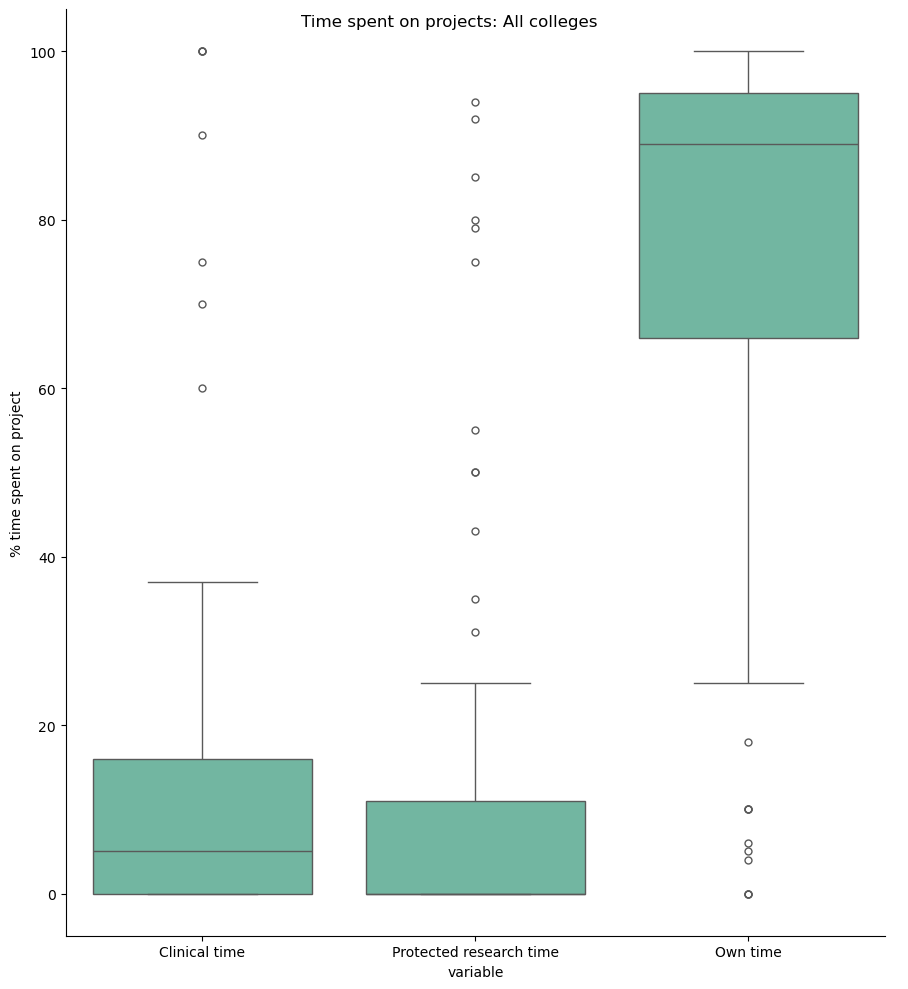

In [54]:
# %%%% Plot data - ALL COLLEGES
colNames = ['During scheduled service/clinical work time', 
            'During protected time - e.g. grant funded time, time allocated for research, etc?',
            'In your own time']

#set up data for plotting - from wide to long
df_projectsTimeSpent_plot = df_projectsTimeSpent[['College']+ colNames]

#wide to long data
df_projectsTimeSpent_plot = pd.melt(df_projectsTimeSpent_plot, 
        id_vars ='College', 
        value_vars = colNames)


#set colors
colors = ["#66c2a5","#fc8d62","#8da0cb"]
sns.set_palette(sns.color_palette(colors))


# Set the figure size
plt.figure(figsize=(10, 10))

# Draw a nested barplot by species and sex
g = sns.catplot(
    
    data=df_projectsTimeSpent_plot, 
    kind="box",
    x="variable", 
    y="value", 
    #hue="variable",
   # col = "College",
    ci="sd", 
   # palette="darkfc8d62", 
    #lpha=.5,
    height = 10,
    aspect = 0.9
)


# Customize the axes and title
#https://stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles

#y axis
axes = g.axes.flatten()
axes[0].set_ylabel("% time spent on project")


#title
g.fig.suptitle('Time spent on projects: All colleges')

g.set_xticklabels(['Clinical time',
                   'Protected research time',
                   'Own time'])


#SAVE FILE
#saveTo = filePath + "Figures\TimeSpent_ALL"

#g.savefig(saveTo,
 #           dpi=150
  #          )

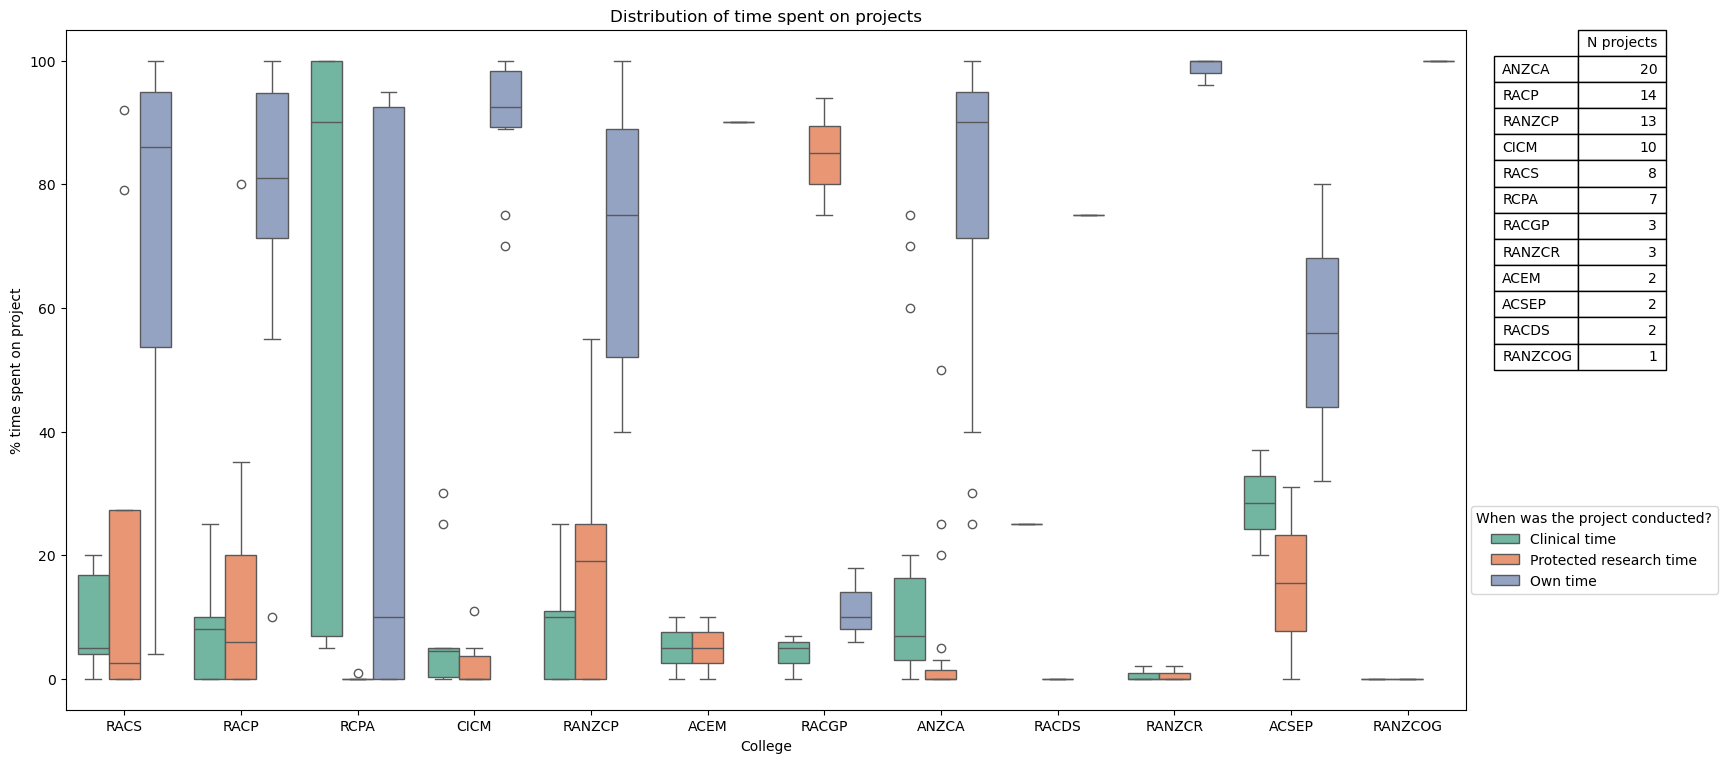

In [55]:
# %%%% Plot data - GROUP BY COLLEGE

df_projectsTimeSpent_plotCOPY = df_projectsTimeSpent_plot.copy()

#replace values with something short for the legend
df_projectsTimeSpent_plotCOPY = df_projectsTimeSpent_plotCOPY.replace(['During scheduled service/clinical work time', 
            'During protected time - e.g. grant funded time, time allocated for research, etc?',
            'In your own time'],
            ['Clinical time',
                   'Protected research time',
                   'Own time'])




# Set the figure size
plt.figure(figsize=(20, 10))


#set colors
colors = ["#66c2a5","#fc8d62","#8da0cb"]
sns.set_palette(sns.color_palette(colors))



# Draw a nested barplot by college
sns.boxplot(
    
    data=df_projectsTimeSpent_plotCOPY, 
    x="College", 
    y="value", 
    hue="variable",
 #   palette="dark", 
   # alpha=0.5
)


# Customize the axes and title
#https://stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles

#Axis label and title

plt.xlabel("College")
plt.ylabel("% time spent on project")
plt.title("Distribution of time spent on projects")




#legend

plt.legend(title='When was the project conducted?', #title

#legend position
bbox_to_anchor=(1.18, 0.3),
loc= 'upper right',
borderaxespad=0,
#ncol = 3
)


#https://matplotlib.org/3.1.0/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py
#https://www.statology.org/seaborn-table/
#add annotation to graph
#annotation is the number of projects contributing to the data from each college

TimeSpentproject_table = df_projectsTimeSpent[["College"]].value_counts().rename_axis('College').reset_index(name='N projects')

#set college as index
TimeSpentproject_table = TimeSpentproject_table.set_index('College')


#add table below scatterplot

table = plt.table(cellText=TimeSpentproject_table.values,
                  rowLabels=TimeSpentproject_table.index,
                  colLabels=TimeSpentproject_table.columns,
                  bbox=(1.08, .5, 0.063, 0.5),
                  colWidths=[0.067]
                   )


plt.subplots_adjust(left=0.2, bottom=0.2)


#save 

saveTo = filePath + "Figures\TimeSpent_BY COLLEGE.png"

#plt.savefig(saveTo,
 #           bbox_inches='tight',
  #          #edgecolor=psg.get_edgecolor(),
   #         #facecolor=.get_facecolor(),
    #        dpi=150
     #       )

plt.show()


### Supervision

In [56]:
# %%% SUPERVISION

#find number eligible to answer the question
# in this case it is all participants that did a project
eligible = projects_total

categories = ["Strongly agree",
              "Agree",
              "Neither agree nor disagree",
              "Disagree",
              "Strongly disagree",
              "I did not have a supervisor"]

df_projectsSupervision = create4colDF(df,
                                      "r",
                                    "My supervisor provided me with adequate research support while conducting your scholarly project.",
                                    categories,
                                    eligible)



### Access to Human Resources

In [57]:
# %% ACCESS TO HUMAN RESOURCES

#find number eligible to answer the question
# in this case it is all participants that did a project
eligible = projects_total




categories = ["Statistician(s)",
              "Health economist(s)",
              "Librarian(s)",
              "Consumer or patient advocate(s)",
              "Experts in research design or measurement",
              "Experts in practice change strategies or practice improvement",
              "Individuals with sufficient breadth and depth of clinical expertise",
              "None of the above"]



df_projectsHRAccess = createMULTIcolDF(df,
                                   "s",
                                       "Please indicate if you had adequate access to any of the following types of individuals while completing your scholarly project ",
                                       r',',
                                       categories,
                                       eligible)



#save results

#saveTo = filePath + "Projects_HR Access.csv"

#df_projectsHRAccess.to_csv(saveTo, index=False)







#find number of projects that involved in 1 or more people

df_projectsHRAccess_times = createMULTIcolDF(df,
                                             "s",
                                             "Please indicate if you had adequate access to any of the following types of individuals while completing your scholarly project ",
                                             r',',
                                             categories,
                                             eligible,
                                             1,
                                             "Number of other professionals trainee had access to") #1 = spits out df earlier, see function above




#save results

#saveTo = filePath + "HRAccess.csv"

#df_projectsHRAccess_times.to_csv(saveTo, index=False)


C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\Bond University\Research Data - ENHANCE_Survey\DataExtraction\ENHANCESurvey\ENHANCE-SurveyAnalysis\Functions.py:443: FutureWarning: The frame.append method is deprecated and will

In [58]:
df_projectsHRAccess_times["Prop. of projects"] = round(df_projectsHRAccess_times["Number of projects"]/85, 2)


#display results
display(HTML("<h4>Access to human resources <h4>"))
display(HTML("<p>Number of relevant experts trainees had access to for each project<p>"))

display(HTML("Number eligible to respond: {}".format(eligible)))
display(HTML("Number of projects we got responses for: 85"))

display(HTML(df_projectsHRAccess_times.to_html()))

,Number of other professionals trainee had access to,Number of projects,Prop. of projects
0,0,17,0.20
0,1,47,0.55
1,2,12,0.14
2,3,6,0.07
3,4,3,0.04


### Overal Project Experience

### Importance to career

In [59]:
# %% IMPORTANCE TO CAREER
#find number eligible to answer the question
# in this case it is all participants that did a project
eligible = len(df[df["Q6"] == "Yes"])


categories = ["Very important",
              "Moderately important",
              "Slightly important",
              "Not at all important"]



column = "Q7"

question = "How important did you feel conducting a scholarly project was to your clinical career development?"

data = "Projects"


#number of participants who were eligible to answer the question
#all participants who did NOT complete a project as part of thier training were eligible to answer this question


df_ImportanceCareer = answersNOTQ9 (df,
              question,
              column,
              categories,
              eligible
              )






#df_ImportanceCareer

### Overall Experience while undertaking project

In [60]:
data1 = []

In [61]:
# %%% QUESTION 10

#!!!!!!!!!!!!!! CHANGE HEADINGS TO PARTICIPANTS NOT PROJECTS

#### Knowledge and Skills

#find number eligible to answer the question
# in this case it is all participants that did a project
eligible = len(df[df["Q6"] == "Yes"])
eligible



#create lsit of responses - will set order of responses

categories = ["Strongly agree",
              "Agree",
              "Neither agree nor disagree",
              "Disagree",
              "Strongly disagree"]


df_KnowledgeSkills = answersNOTQ9 (df,
                                   "I had the necessary knowledge and skills to complete my scholarly project(s).",
                                   "Q10_1", 
                                   categories,
                                   eligible,
                                   "Projects")


data1.append(df_KnowledgeSkills)





#### RESEARCH SEMINAR ACCESS

df_Seminars = answersNOTQ9 (df,
                            "I had access to a good research-related seminar(s) or training program.",
                            "Q10_2", 
                            categories,
                                   eligible)


data1.append(df_Seminars)





#### Improve EBP

df_UnderstandEBP = answersNOTQ9 (df,
                                 "Completing a scholarly project(s) during my specialty training gave me a better understanding of how to read and interpret other people’s research",
                            "Q10_3", 
                            categories,
                                   eligible)



data1.append(df_UnderstandEBP)



#### Overall Satisfation

df_OverallSatisfaction = answersNOTQ9 (df,
                                   "Overall, I was satisfied with the quality of my research experience during my specialty training",
                                       "Q10_4",
                                       categories,
                                   eligible)







#### COMMENTS

df_Comments =  df[df.Q3_1 == "RACS"][["Q3_2", "Q12","Q13"]]


data1.append(df_OverallSatisfaction)

#df_OverallSatisfaction

### Participation in resarch after training

In [62]:
#find number eligible to answer the question
# in this case it is all participants that have finished their training
eligible = len(df[df["Q1"] == "Yes"])



categories = ["Yes ", 
              "No"]

df_NewResearch = answersNOTQ9 (df,
                               "Since gaining your most recent fellowship, have you considered initiating a new research project? ",
                                       "Q14a",
                                       categories,
                                   eligible,
                                           projectsOnly = "No")




#df_NewResearch





In [63]:
df_NewResearch_participate = answersNOTQ9 (df,
                                           "Since gaining your most recent fellowship, have you participated in any research projects as an investigator?",
                                           "Q14c",
                                           categories,
                                           eligible,
                                           projectsOnly = "No")


#df_NewResearch_participate

### Supportive of projects

In [64]:
#find number eligible to answer the question
# in this case it is all participants 
eligible = len(df)



categories = ["Strongly support",
              "Moderately support",
              "Neither support nor oppose",
              "Moderately oppose",
              "Strongly oppose"]

df_projectSUPPORT = answersNOTQ9 (df,
                               "How much do you support or oppose the requirement to complete a scholarly project during specialty training?",
                                       "Q12",
                                       categories,
                                       eligible)


#df_projectSUPPORT


## Project conduct tables


### Updated Version (Resubmission)

In [65]:
#REVISED (based on peer review; some items moved to figures)
#Table 2 project conduct

#create section headings for table
colNames = ["Question", 
            "Answer", 
            "Number of projects", 
            "Prop. of projects"]



StudyProvidence_Heading = pd.DataFrame(data = [["STUDY PROVENANCE", "", "", ""]],
                                    columns = colNames)


ResearchSupport_Heading = pd.DataFrame(data = [["RESEARCH SUPPORT REPORTED BY TRAINEES.", "", "", ""]],
                                    columns = colNames)


Colleges_Heading = pd.DataFrame(data = [["COLLEGES REPRESENTED IN THE DATA", "", "", ""]],
                                    columns = colNames)

StudyProvidence_Heading = pd.DataFrame(data = [["STUDY PROVENANCE", "", "", ""]],
                                    columns = colNames)


ResearchSupport_Heading = pd.DataFrame(data = [["RESEARCH SUPPORT REPORTED BY TRAINEES.", "", "", ""]],
                                    columns = colNames)



#change headings for college df
df_collegesOnlyProject.rename(columns={'Number of participants (Gave project data)': 'Number of projects', 'Prop. of participants (Gave project data)': 'Prop. of projects'}, inplace=True)






#create df of questions relevant to "study conduct
df_OverallProjectConduct_SUPP2 = pd.concat([
    #colleges that contributed data
    Colleges_Heading,
    df_collegesOnlyProject,
    #additional details on study providence
    StudyProvidence_Heading,
    df_projectsQuestion,
    df_projectsStudyDesign,
    df_projectsProtocolApriori,
    df_projectsProtocolRegistered,
   # df_projectsSR,
    df_projectsConsumer,
    df_projectsConsumer_aspect,
    df_projectsConsumer_level,   
    
    #additional details on support
    ResearchSupport_Heading,
    df_projectsOthersInvolved,
    df_projectsHRAccess,
  #  df_projectsSupervision,
    df_Seminars

])







#rename columns

#df_OverallProjectConduct.rename(columns={'Number of projects': 'Number of participants', 'Prop. of projects': 'Prop. of participants'}, inplace=True)


#take values across
df_OverallProjectConduct_SUPP2['Answer']= np.where(df_OverallProjectConduct_SUPP2['Answer']=='', df_OverallProjectConduct_SUPP2['Question'], df_OverallProjectConduct_SUPP2['Answer'])

#remove question column
df_OverallProjectConduct_SUPP2 = df_OverallProjectConduct_SUPP2.drop('Question', axis=1) 

#save results
saveTo = filePath + "Tables/Projects_OverallConduct.csv"

df_OverallProjectConduct_SUPP2.to_csv(saveTo, index=False)


df_OverallProjectConduct_SUPP2

,Answer,Number of projects,Prop. of projects
0,COLLEGES REPRESENTED IN THE DATA,,
0,Colleges that gave project data,,
1,Eligible,177.0,
2,Total answered,79.0,45% *
3,ACD,0.0,0%
...,...,...,...
3,Strongly agree,6,9%
4,Agree,13,19%
5,Neither agree nor disagree,8,12%
6,Disagree,28,41%


## Project value

In [66]:
#REVISED (based on peer review; some items moved to figures)
#Table 5 Project Value


#create section headings for table
colNames = ["Question", 
            "Answer", 
            "Number of projects", 
            "Prop. of projects"]




PrecievedValueResearch_Heading = pd.DataFrame(data = [["PERCEIVED VALUE OF RESEARCH FINDINGS AND PUBLICATION STATUS", "", "", ""]],
                                    columns = colNames)

PrecievedValuePersonal_Heading = pd.DataFrame(data = [["PERCEIVED PERSONAL VALUE OF CONDUCTING RESEARCH PROJECTS", "", 'Number of participants', 'Prop. of participants']],
                                    columns = colNames)



#create df of questions relevant to "asking relevant quuestions"
df_OverallProjectValueSUPP = pd.concat([
    #precieved value of the project
    PrecievedValueResearch_Heading,
  #  df_projectsUseful,
    df_projectsConfidence,
    df_projectsResultsPublic,
    df_projectsAuthorPos,
    #precieved value to the trainee
    PrecievedValuePersonal_Heading,
    df_ImportanceCareer,
   # df_KnowledgeSkills,
   # df_UnderstandEBP,
   # df_NewResearch,
   # df_NewResearch_participate,
       
])


#rename columns

#df_OverallProjectValueSUPP.rename(columns={'Number of projects': 'Number of participants', 'Prop. of projects': 'Prop. of participants'}, inplace=True)


#take values across
df_OverallProjectValueSUPP['Answer']= np.where(df_OverallProjectValueSUPP['Answer']=='', df_OverallProjectValueSUPP['Question'], df_OverallProjectValueSUPP['Answer'])

#remove question column
df_OverallProjectValueSUPP = df_OverallProjectValueSUPP.drop('Question', axis=1) 

#save results
saveTo = filePath + "Tables/Projects_Value.csv"

df_OverallProjectValueSUPP.to_csv(saveTo, index=False)


df_OverallProjectValueSUPP




,Answer,Number of projects,Prop. of projects
0,PERCEIVED VALUE OF RESEARCH FINDINGS AND PUBLI...,,
0,How confident are you in using the findings of...,,
1,Eligible,267.0,-
2,Total answered,90.0,34% *
3,Very confident,39.0,43%
4,Somewhat confident,42.0,47%
5,Not at all confident,9.0,10%
0,Is a manuscript containing the results publicl...,,
1,Eligible,267.0,-
2,Total answered,90.0,34% *


## Tables for plotting

Added afer peer review - some items that were in tables moved here.


### Likert Scale 

df_projectsSupervision: Strongly agree', 'Agree', 'Neither agree nor disagree', 'Disagree', 'Strongly disagree', 'I did not have a supervisor'

df_KnowledgeSkills
- No changes

df_projectSUPPORT (3) Strongly support', 'Moderately support', 'Neither support nor oppose', 'Moderately oppose', 'Strongly oppose'
- Change question How much do you support or oppose the requirement to complete a scholarly project during specialty training? TO I support the requirement to complete a scholarly project during specialty training (3)
- Map to Strongly agree', 'Agree','Neither agree nor disagree', 'Disagree', 'Strongly disagree'


df_OverallSatisfaction:
- No changes


In [67]:
#### Change questions and responses as above
### SUPPORT OF MANDATORY PROJECTS
dictionary = {'How much do you support or oppose the requirement to complete a scholarly project during specialty training?': "I support the requirement to complete \na scholarly project during specialty training",
        "Strongly support": "Strongly agree",
        'Moderately support': 'Agree',
         'Neither support nor oppose':'Neither agree nor disagree', 
        'Moderately oppose':'Disagree',
         'Strongly oppose':'Strongly disagree'  
}

df_projectSUPPORT1 = df_projectSUPPORT.replace({"Answer":dictionary})
df_projectSUPPORT1 = df_projectSUPPORT1.replace({"Question":dictionary})

#df_projectSUPPORT1


#### Change questions and responses as above
###SUPERVISOR SUPPORT
dictionary = {"My supervisor provided me with adequate research support while conducting your scholarly project.": 'My supervisor provided me with adequate research \nsupport while conducting your scholarly project.*',
        
}

df_projectsSupervision1 = df_projectsSupervision.replace({"Answer":dictionary})
df_projectsSupervision1 = df_projectsSupervision1.replace({"Question":dictionary})

#df_projectsSupervision1


#### Change questions and responses as above
###KNOWLEDGE SKILLS
dictionary = {"I had the necessary knowledge and skills to complete my scholarly project(s).": 'I had the necessary knowledge and \nskills to complete my scholarly project(s).',
        
}

df_KnowledgeSkills1 = df_KnowledgeSkills.replace({"Answer":dictionary})
df_KnowledgeSkills1 = df_KnowledgeSkills1.replace({"Question":dictionary})

#df_projectsSupervision1


#### Change questions and responses as above
###OVERALL SATISFACTION
dictionary = {"Overall, I was satisfied with the quality of my research experience during my specialty training": 'Overall, I was satisfied with the quality of my \nresearch experience during my specialty training.',
        
}

df_OverallSatisfaction1 = df_OverallSatisfaction.replace({"Answer":dictionary})
df_OverallSatisfaction1 = df_OverallSatisfaction1.replace({"Question":dictionary})

#df_OverallSatisfaction1





In [68]:
#create large df of all the likert data

df_Likert= pd.concat([df_projectSUPPORT1,
                      df_projectsSupervision1,
                      df_KnowledgeSkills1,
                      df_OverallSatisfaction1
])

#df_Likert

In [69]:

#replace white space with NA
df_Likert = df_Likert.replace(r'^\s*$', np.nan, regex=True)

#fill down
df_Likert["Question"]= df_Likert["Question"].fillna(method = "ffill")

#remove rows with NAs
df_Likert = df_Likert.dropna(subset= ["Answer"])


#replace white space with NA
df_Likert = df_Likert.replace(r'^\s*$', np.nan, regex=True)

#fill nulls with 0
df_Likert = df_Likert.fillna(0)

#create numbers for plotting
df_Likert["PropNum"] = df_Likert["Prop. of projects"]
#remove % and * signs
df_Likert["PropNum"].replace(['%','\*'],'',regex=True,inplace=True)
#replace white space with NA
df_Likert["PropNum"].replace('-', np.nan, regex=True, inplace= True)


#turn into numbers
df_Likert["PropNum"]= df_Likert["PropNum"].astype(float)



In [70]:
#create label for eligible and answered

rows = ["Eligible", "Total answered"]

dfLabels = df_Likert[df_Likert.Answer.isin(rows)]

#reverse order
dfLabels=dfLabels.iloc[::-1]

#convert to string
dfLabels['Number of projects'] = dfLabels['Number of projects'].astype(int).astype(str)

#merge to get  numbers
dfLabels['Number of projects'] = dfLabels.groupby(['Question'])['Number of projects'].transform(lambda x : '/ '.join(x)) 

#drop duplicates
dfLabels = dfLabels[dfLabels["Answer"]== "Total answered"]

#remove * signs
dfLabels["Prop. of projects"].replace(['\*', r'^\s*$'],'',regex=True,inplace=True)


dfLabels["Question1"] = dfLabels["Question"] + "\n(n/N = " + dfLabels["Number of projects"] + ", " + dfLabels["Prop. of projects"] + ")"

#make a dictionary to map original data
question_Dict = pd.Series(dfLabels["Question1"].values,index=dfLabels["Question"]).to_dict()



#map dfs
df_LikertPlot = df_Likert.replace({"Question":question_Dict})
#df_LikertPlot.Question.unique()


#### Plot Likert Data

In [71]:
#https://github.com/nmalkin/plot-likert/blob/release/docs/guide.ipynb

df_LikertPlot = df_LikertPlot[~df_LikertPlot.Answer.isin(['Eligible', 'Total answered','I did not have a supervisor'])]

#long to wide data
df_Likert_pyPlot1 = df_LikertPlot.pivot(index='Question', columns='Answer', values='PropNum')

#fill nulls with 0
df_Likert_pyPlot1 = df_Likert_pyPlot1.fillna(0)

#df_Likert_pyPlot1.replace('%','',regex=True,inplace=True)

df_Likert_pyPlot1 = df_Likert_pyPlot1.astype(float)

#change order of columns for plotting
df_Likert_pyPlot1 = df_Likert_pyPlot1[['Strongly disagree',
     'Disagree', 
     'Neither agree nor disagree', 
     'Agree',
     'Strongly agree']]

#save for plotting for journal
#save results
saveTo = "Results/Section1/Tables/ForPlotting_LikertR.csv"

df_Likert_pyPlot1.to_csv(saveTo, index=True)

C:\Users\s2997324\AppData\Local\anaconda3\envs\PyR\lib\site-packages\plot_likert\plot_likert.py:313: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.


Text(0, 0.5, '')

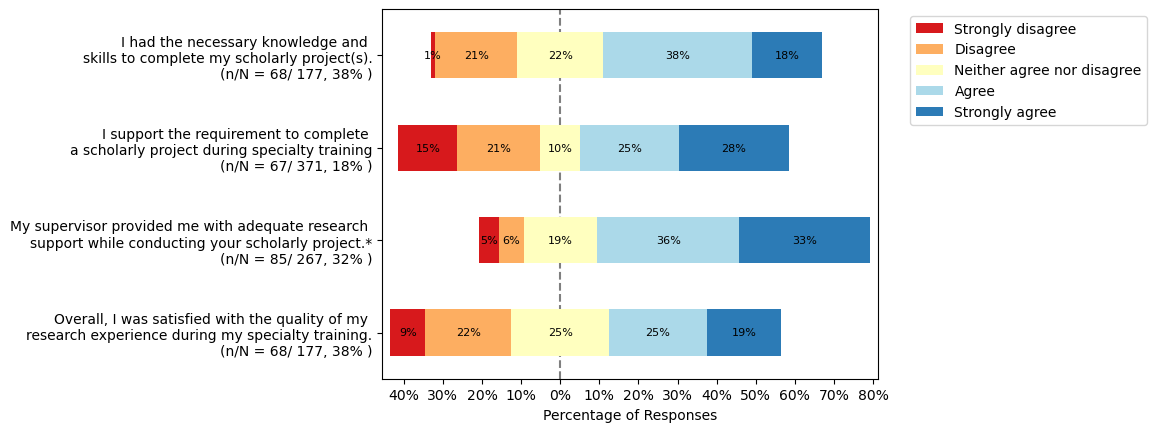

In [72]:
#set scale
another_scale = \
    [ 'Strongly disagree',
     'Disagree', 
     'Neither agree nor disagree', 
     'Agree',
     'Strongly agree',
     ]

scaleColors = ["#ffffff00",
               "#d7191c",
               "#fdae61",
               "#ffffbf",
               "#abd9e9",
               "#2c7bb6"
               
    
]


axes = plot_likert.plot_counts(df_Likert_pyPlot1,
                               another_scale,
                               compute_percentages=True,
                              colors=scaleColors
                              )

#f'${value/1000:.1f}K
#'%.0f'

#show % to two dp
for c in axes.containers[1:]: axes.bar_label(c, fmt='%.0f%%', label_type='center', color = "black", fontsize = 8)

#axes.set_facecolor('xkcd:cloudy blue')

#annotations = axes.bar_label(axes.containers[0:4], fmt='%.0f%%')
axes.yaxis.set_label_text('')


In [73]:
#save figure
FileName = "Results/Section1/Plot_LikertScale.png"

axes.get_figure().savefig(FileName, dpi=300, bbox_inches='tight')
     

### Yes/No response

df_projectsSR: yes, no

df_projectsProtocolApriori: 
- 'Yes - I developed one myself':'Yes (a)'
- 'Yes - there one already developed':'Yes (b)', 
- 'No': 'No'


df_projectsProtocolRegistered: 
- 'Yes - Published in a journal': 'Yes (a)',
- 'Yes - in a registry (e.g. PROSPERO, ClinicalTrials.gov, OSF, etc):': 'Yes (b)', 
- 'Yes - Other. Please state where:':Yes (c), 
- 'No ': 'No'


df_projectsOthersInvolved
- 'Yes - Medical professional(s) from a different specialty. Please specify:': 'Yes (a)',
- 'Yes - Allied Health Professional(s). Please specify:': 'Yes (b)',
- 'Yes - Nursing staff. ':'Yes (c)', 
- 'Yes -Statistician(s).': 'Yes (d)',
- 'Yes - Health economist(s).': 'Yes (e)',
- 'Yes - Librarian(s)/ Information Specialist(s).': 'Yes (f)',
- 'Yes - Data scientist(s).': 'Yes (g)', 
- 'Yes - Other. Please specify:': 'Yes (h)', 
- 'No': 'No'


df_projectsHRAccess
- Please indicate if you had adequate access to any of the following types of individuals while completing your scholarly project : "Which one of the following did you have adequate access to while completing your scholarly project" 
- 'Statistician(s)': 'Yes (a)'
- 'Health economist(s)': 'Yes (b)',
- 'Librarian(s)': 'Yes (c)',
- 'Consumer or patient advocate(s)': 'Yes (d)',
- 'Experts in research design or measurement': 'Yes (e)',
- 'Experts in practice change strategies or practice improvement': 'Yes (f)',
- 'Individuals with sufficient breadth and depth of clinical expertise': 'Yes (g)',
- 'None of the above': "No"




df_projectsUseful: yes, no

df_projectsLocalPresent: yes, no

df_projectsResultsPublic: 
- 'Yes - Published in a journal by the end of your training ': 'Yes (a)',
- 'Yes - Subsequently published in a journal': 'Yes (b)',
- 'Yes - Pre-print available': 'Yes (c)', 
- 'No - It is unpublished' : "No"

df_NewResearch: yes, no

df_NewResearch_participate: yes, no

In [74]:
#### Change questions and responses as above
dictionary = {'Before starting data collection for this project, did you develop research protocol?': 'Protocol developed before data collection.',
        'Yes - I developed one myself':'Yes (a)',
        'Yes - there one already developed':'Yes (b)', 
        'No': 'No'  
}

df_projectsProtocolApriori1 = df_projectsProtocolApriori.replace({"Answer":dictionary})
df_projectsProtocolApriori1 = df_projectsProtocolApriori1.replace({"Question":dictionary})

df_projectsProtocolApriori1


#### Change questions and responses as above
dictionary = {'Was the protocol registered in a publicly available place?**': 'Protocol registered in a publicly available place.*',
    'Yes - Published in a journal': 'Yes (a)',
        'Yes - in a registry (e.g. PROSPERO, ClinicalTrials.gov, OSF, etc):': 'Yes (b)', 
        'Yes - Other. Please state where:':'Yes (c)', 
        'No ': 'No'
}

df_projectsProtocolRegistered1 = df_projectsProtocolRegistered.replace({"Answer":dictionary})
df_projectsProtocolRegistered1 = df_projectsProtocolRegistered1.replace({"Question":dictionary})

df_projectsProtocolRegistered1


#### Change questions and responses as above
dictionary = {'Did your research team consist of members outside of your own profession?':"Research team consisted of members outside of trainee's own profession.*",
        'Yes - Medical professional(s) from a different specialty. Please specify:': 'Yes (a)',
        'Yes - Allied Health Professional(s). Please specify:': 'Yes (b)',
        'Yes - Nursing staff. ': 'Yes (c)', 
        'Yes -Statistician(s).': 'Yes (d)',
        'Yes - Health economist(s).': 'Yes (e)',
        'Yes - Librarian(s)/ Information Specialist(s).': 'Yes (f)',
        'Yes - Data scientist(s).': 'Yes (g)', 
        'Yes - Other. Please specify:': 'Yes (h)', 
        'No': 'No'
}

df_projectsOthersInvolved1 = df_projectsOthersInvolved.replace({"Answer":dictionary})
df_projectsOthersInvolved1 = df_projectsOthersInvolved1.replace({"Question":dictionary})



#### Change questions and responses as above
dictionary = {'Please indicate if you had adequate access to any of the following types of individuals while completing your scholarly project ' : "Adequate access to relevant expertise to while completing scholarly project(s).*", 
        'Statistician(s)': 'Yes (a)',
        'Health economist(s)': 'Yes (b)',
        'Librarian(s)': 'Yes (c)',
        'Consumer or patient advocate(s)': 'Yes (d)',
        'Experts in research design or measurement': 'Yes (e)',
        'Experts in practice change strategies or practice improvement': 'Yes (f)',
        'Individuals with sufficient breadth and depth of clinical expertise': 'Yes (g)',
        'None of the above': "No"
}

df_projectsHRAccess1 = df_projectsHRAccess.replace({"Answer":dictionary})
df_projectsHRAccess1 = df_projectsHRAccess1.replace({"Question":dictionary})

df_projectsHRAccess1



#### Change questions and responses as above
dictionary = {'Is a manuscript containing the results publicly available?': 'Results are publicly available.',
        'Yes - Published in a journal by the end of your training ': 'Yes (a)',
        'Yes - Subsequently published in a journal': 'Yes (b)',
        'Yes - Pre-print available': 'Yes (c)', 
        'No - It is unpublished' : "No"
}

df_projectsResultsPublic1 = df_projectsResultsPublic.replace({"Answer":dictionary})
df_projectsResultsPublic1 = df_projectsResultsPublic1.replace({"Question":dictionary})

df_projectsResultsPublic1




#### Change questions and responses as above
dictionary = {'Do you or your colleagues believe that the results of this study may be useful in practice?':'Trainee or colleagues believe that the results are useful in practice.'
}

df_projectsUseful1 = df_projectsUseful.replace({"Answer":dictionary})
df_projectsUseful1 = df_projectsUseful1.replace({"Question":dictionary})

df_projectsUseful1


#### Change questions and responses as above
dictionary = {'Since gaining your most recent fellowship, have you considered initiating a new research project? ': 'Has considered initiating a new research since completing training.'
}

df_NewResearch1 = df_NewResearch.replace({"Answer":dictionary})
df_NewResearch1 = df_NewResearch1.replace({"Question":dictionary})

df_NewResearch1


#### Change questions and responses as above
dictionary = {'Were the results of your study presented to the department where are doing or did your clinical training?':'Results presented to department.'
}

df_projectsLocalPresent1 = df_projectsLocalPresent.replace({"Answer":dictionary})
df_projectsLocalPresent1 = df_projectsLocalPresent1.replace({"Question":dictionary})

df_projectsLocalPresent1




#### Change questions and responses as above
dictionary = {'Were consumers involved in the design of your research?':'Consumers involved in research.'
}

df_projectsConsumer1 = df_projectsConsumer.replace({"Answer":dictionary})
df_projectsConsumer1 = df_projectsConsumer1.replace({"Question":dictionary})



#### Change questions and responses as above
dictionary = {'Since gaining your most recent fellowship, have you participated in any research projects as an investigator?':'Has participated in research projects since completing training.'
}

df_NewResearch_participate1 = df_NewResearch_participate.replace({"Answer":dictionary})
df_NewResearch_participate1 = df_NewResearch_participate1.replace({"Question":dictionary})

df_NewResearch_participate1



#### Change questions and responses as above
dictionary = {'Before starting your project, did you search for a systematic review or other type of review (e.g. scoping review) that answered your question prior to starting your research?': 'Searched for a review before to starting project.'
}

df_projectsSR1 = df_projectsSR.replace({"Answer":dictionary})
df_projectsSR1 = df_projectsSR1.replace({"Question":dictionary})

df_projectsSR1


,Question,Answer,Number of projects,Prop. of projects
0,Searched for a review before to starting project.,,,
1,,Eligible,267.0,-
2,,Total answered,92.0,34% *
3,,Yes,68.0,74%
4,,No,24.0,26%


In [75]:
#create large df of all the likert data

df_YesNo= pd.concat([
    df_projectsSR1,
    df_projectsProtocolApriori1,
df_projectsProtocolRegistered1,
    df_projectsConsumer1,
df_projectsOthersInvolved1,
df_projectsHRAccess1,
df_projectsUseful1,
df_projectsLocalPresent1,
df_projectsResultsPublic1,
df_NewResearch1,
df_NewResearch_participate1
])

#replace white space with NA
df_YesNo = df_YesNo.replace(r'^\s*$', np.nan, regex=True)

#fill down
df_YesNo["Question"]= df_YesNo["Question"].fillna(method = "ffill")

#remove rows with NAs
df_YesNo = df_YesNo.dropna(subset= ["Answer"])

#replace 'Yes ' with 'Yes'
df_YesNo = df_YesNo.replace('Yes ', 'Yes')



#fill nulls with 0
df_YesNo = df_YesNo.fillna(0)

#create numbers for plotting
df_YesNo["PropNum"] = df_YesNo["Prop. of projects"]
#remove % and * signs
df_YesNo["PropNum"].replace(['%','\*'],'',regex=True,inplace=True)
#replace white space with NA
df_YesNo["PropNum"].replace('-', np.nan, regex=True, inplace= True)


#turn into numbers
df_YesNo["PropNum"]= df_YesNo["PropNum"].astype(float)


df_YesNo

,Question,Answer,Number of projects,Prop. of projects,PropNum
1,Searched for a review before to starting project.,Eligible,267.0,-,NaN
2,Searched for a review before to starting project.,Total answered,92.0,34% *,34.0
3,Searched for a review before to starting project.,Yes,68.0,74%,74.0
4,Searched for a review before to starting project.,No,24.0,26%,26.0
1,Protocol developed before data collection.,Eligible,267.0,-,NaN
...,...,...,...,...,...
4,Has considered initiating a new research since...,No,17.0,28%,28.0
1,Has participated in research projects since co...,Eligible,133.0,0,0.0
2,Has participated in research projects since co...,Total answered,61.0,46% *,46.0
3,Has participated in research projects since co...,Yes,33.0,54%,54.0


In [76]:
#create label for eligible and answered

rows = ["Eligible", "Total answered"]

dfLabels = df_YesNo[df_YesNo.Answer.isin(rows)]

#reverse order
dfLabels=dfLabels.iloc[::-1]

#convert to string
dfLabels['Number of projects'] = dfLabels['Number of projects'].astype(int).astype(str)

#merge to get  numbers
dfLabels['Number of projects'] = dfLabels.groupby(['Question'])['Number of projects'].transform(lambda x : '/ '.join(x)) 

#drop duplicates
dfLabels = dfLabels[dfLabels["Answer"]== "Total answered"]

#remove * signs
dfLabels["Prop. of projects"].replace(['\*', r'^\s*$'],'',regex=True,inplace=True)

dfLabels["Question1"] = dfLabels["Question"] + "\n(n/N = " + dfLabels["Number of projects"] + ", " + dfLabels["Prop. of projects"] + ")"

#make a dictionary to map original data
question_Dict = pd.Series(dfLabels["Question1"].values,index=dfLabels["Question"]).to_dict()



#map dfs
df_YesNoPlot = df_YesNo.replace({"Question":question_Dict})
#df_YesNoPlot.Question.unique()

In [77]:
#calculate "Yes's" from no - ie 100% - %No

values = ["Total answered", "Total answered †","No"]


#get No values
df_Yes = df_YesNoPlot[df_YesNoPlot["Answer"].isin(values)]

df_Yes["Total"] = df_Yes["Number of projects"]

#get rid of the no values
df_Yes.loc[df_Yes["Answer"] == "No", "Total"] = np.nan 
#fill down
df_Yes["Total"] = df_Yes["Total"].fillna(method = "ffill")

df_Yes["Number of projects"] = df_Yes["Total"] - df_Yes["Number of projects"]

df_Yes["PropNum"] = 100 - df_Yes["PropNum"]

#only keep the No rows
df_Yes = df_Yes[df_Yes["Answer"].isin(["No"])]

#change answer to Yes
df_Yes["Answer"]  = "Yes"

df_Yes.drop(columns=['Total'], inplace = True)


df_Yes["Prop. of projects"] = df_Yes["PropNum"].astype(int).astype(str) + '%' 
                  
#df_Yes

C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\3035341976.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\3035341976.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\3035341976.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [78]:
values = ["Total answered", "Total answered †","No", 'Eligible']


#get No values
df_No = df_YesNoPlot[df_YesNoPlot["Answer"].isin(values)]

#merge dfs
df_YesNo1= pd.concat([
   df_Yes,
    df_No
])



#df_YesNo1

#### Plot Yes/No data

In [79]:
df_YesNoPlot = df_YesNo1[~df_YesNo1.Answer.isin(['Eligible', 'Total answered', "Total answered †"])]

#make No values negative
df_YesNoPlot.loc[df_YesNoPlot.Answer=="No",'PropNum':]*=-1

#df_YesNoPlot

In [80]:
#save results
saveTo = "Results/Section1/Tables/ForPlotting_YesNo.csv"

df_YesNoPlot.to_csv(saveTo, index=True)

# Analysis of Section 2 of the survey data

In [81]:
#get list of columns that are Q19
r = re.compile("^Q19_\d*$")

newlist = list(filter(r.match, headings)) # Read Note below

#add Q10_2 & Q10_6 as it was part of PREQ but added to the main survey
newlist = ["Q10_2", "Q10_4"] + newlist

#add Q3 to the list and Q
cols = ["Q3_1","Q3_2", "Q12", "Q14c", "Q16"]  + newlist

#get df with just Q19 (section 2) of the survey
df_section2 = df.loc[:, cols]

#remove rows where they havent answered the question
df_section2 = df_section2.dropna(subset=newlist)

#df_section2

In [82]:
#get college names represented in data set
df_section2colleges = df_section2[["Q3_1", "Q3_2"]]

df_section2colleges = pd.DataFrame(df_section2colleges.groupby(["Q3_1", "Q3_2"]).size()) #count number represented

df_section2colleges.reset_index(inplace=True)

df_section2colleges.columns = ["College", 'Subspecialty','Number of participants']#rename column


#save results
#df_section2colleges.to_csv("Results/Section2/PREQ_Participants_by_collegeSubspeciality.csv", index=False)


#df_section2colleges

In [83]:
#number eligible to do part 2
eligible = len(df[df["Q6"] == "Yes"])

#number that completed part 2
complete_PREQ =sum(df_section2colleges["Number of participants"])

print(complete_PREQ)

complete_PREQ/eligible


10


0.05649717514124294

In [84]:
# Created stacked bar plot
#https://www.geeksforgeeks.org/how-to-create-a-stacked-bar-plot-in-seaborn/
#https://saturncloud.io/blog/legend-outside-the-plot-in-python-matplotlib/#:~:text=To%20move%20the%20legend%20outside,parameters%20of%20the%20legend%20function.&text=The%20bbox_to_anchor%20parameter%20specifies%20the,legend%27s%20anchor%20point%20should%20be.

#get df with just Q19 (section 2) of the survey
df_section2plot = df_section2.loc[:, newlist]

#give new index
df_section2plot = df_section2plot.reset_index()

#rename index column
df_section2plot = df_section2plot.rename({'index': 'Participant'}, axis=1)

#df_section2plot




In [85]:
#go from wide to long
df_section2plot_long = pd.melt(df_section2plot, id_vars='Participant', value_vars=newlist)

#df_section2plot_long

In [86]:
#dict to rename columns to questions
questionNames = {"Q10_2": "I had access to a good research-related seminar(s) or training program.",
"Q10_4": "Overall, I was satisfied with the quality of my research experience during my specialty training.",
    'Q19_1': "Supervision was available when I needed it", 
'Q19_2': "My supervisor(s) made a real effort to understand difficulties I faced",
'Q19_3': "My supervisor(s) provided additional information relevant to my topic", 
'Q19_4': "I was given good guidance in topic selection and refinement", 
'Q19_5': "My supervisor(s) provided helpful feedback on my progress", 
'Q19_6': "I received good guidance in my literature search", 
'Q19_7': "The department provided opportunities for social contact with other trainees undertaking a scholarly project.", 
'Q19_8': "I was integrated into the departments community",
'Q19_9': "The department provided opportunities for me to become involved in the broader research culture",
'Q19_10': "The research environment in the department or faculty stimulated my work", 
'Q19_11': "My research further developed my problem-solving skills", 
'Q19_12': "I improved my ability to communicate information effectively to diverse audiences", 
'Q19_13': "I developed my skills in critical analysis and evaluation", 
'Q19_14': "I improved my ability to plan and manage my time effectively ", 
'Q19_15': "As a result of my research, I feel confident about tackling unfamiliar problems ",
'Q19_16': "I gained confidence in leading and influencing others", 
'Q19_17': "I improved my ability to design and implement projects effectively", 
'Q19_18': "I developed my understanding of research integrity (e.g. rigour, ethics, transparency, attributing the contribution of others)", 
'Q19_19': "I had access to a suitable working space",  
'Q19_20': "I had good access to the technical support I needed", 
'Q19_21': "I was able to organise good access to necessary equipment",
'Q19_22': "I had good access to computing facilities and services", 
'Q19_23': "There was appropriate financial support for research activities", 
'Q19_24': "The thesis examination process was fair", 
'Q19_25': "I was satisfied with the thesis examination process", 
'Q19_26': "The examination of my thesis was completed in a reasonable time", 
'Q19_27': "I developed an understanding of the standard of work expected", 
'Q19_28': "I understood the required standard for the thesis",
'Q19_29': "I understood the requirements of thesis examination"}



#dict of domains
domains = {

"Supervision" : ["Supervision was available when I needed it", 
"My supervisor(s) made a real effort to understand difficulties I faced",
"My supervisor(s) provided additional information relevant to my topic", 
"I was given good guidance in topic selection and refinement", 
"My supervisor(s) provided helpful feedback on my progress",
"I received good guidance in my literature search"
],

"Intellectual Climate": ["The department provided opportunities for social contact with other trainees undertaking a scholarly project.", 
"I was integrated into the departments community",
"The department provided opportunities for me to become involved in the broader research culture",
"I had access to a good research-related seminar(s) or training program.",
"The research environment in the department or faculty stimulated my work", 
"My research further developed my problem-solving skills"
], 
    
"Skill Development": ["I improved my ability to communicate information effectively to diverse audiences", 
"I developed my skills in critical analysis and evaluation", 
"I improved my ability to plan and manage my time effectively ", 
"As a result of my research, I feel confident about tackling unfamiliar problems ",
"I gained confidence in leading and influencing others", 
"I improved my ability to design and implement projects effectively", 
"I developed my understanding of research integrity (e.g. rigour, ethics, transparency, attributing the contribution of others)"
],

"Infrastructure": ["I had access to a suitable working space",  
"I had good access to the technical support I needed", 
"I was able to organise good access to necessary equipment",
"I had good access to computing facilities and services", 
"There was appropriate financial support for research activities", 
],

"Thesis Examination": ["The thesis examination process was fair", 
"I was satisfied with the thesis examination process", 
"The examination of my thesis was completed in a reasonable time"
],

"Goals and Expectations": [
    "I developed an understanding of the standard of work expected",
    "I understood the required standard for the thesis",
    "I understood the requirements of thesis examination"
],

"Overall": ["Overall, I was satisfied with the quality of my research experience during my specialty training."]

}

In [87]:
df_section2plot_long

#rename questions
df_section2plot_long['Question'] = df_section2plot_long['variable'].map(questionNames)


#Map to domains dictionary
for key in domains:
   df_section2plot_long.loc[df_section2plot_long.Question.isin(domains[key]), 'Domains'] = key

#df_section2plot_long

In [88]:
#create cross tab with questions as the columns and counts
df_section2plot_cross = pd.DataFrame(pd.crosstab(df_section2plot_long.Question, df_section2plot_long.value))


#reorder columns
order = ['Strongly disagree', 
        'Disagree', 
        'Somewhat disagree',
        'Neither agree nor disagree',
        'Somewhat agree',
        'Agree', 'Strongly agree'
        
       ]

df_section2plot_cross = df_section2plot_cross[order]


#see how many participants responded to the questions
df_section2plot_cross.sum(axis=1)



#Map to domains dictionary
for key in domains:
   df_section2plot_cross.loc[df_section2plot_cross.index.isin(domains[key]), 'Domains'] = key

#df_section2plot_cross

In [89]:
#see how many participants responded to the questions
#df_section2plot_cross.sum(axis=1)

## Plot the data

In [90]:
#rename column
df_section2plot_long = df_section2plot_long.rename(columns={'value': 'Response'})

#df_section2plot_long.head()



In [91]:
df_section2plot_heat = df_section2plot_long[["Question","Response"]]
df_section2plot_heat


df_section2plot_heat = df_section2plot_heat.groupby(["Question", "Response"])['Response'].count().to_frame()

df_section2plot_heat = df_section2plot_heat.rename(columns={'Response': 'Number of participants'})
df_section2plot_heat.reset_index(inplace=True)


#Map to domains dictionary
for key in domains:
   df_section2plot_heat.loc[df_section2plot_heat.Question.isin(domains[key]), 'Domains'] = key

#add domain_question column
df_section2plot_heat["DomQuestion"] = df_section2plot_heat["Domains"] + ": " + df_section2plot_heat["Question"]

#df_section2plot_heat

In [92]:
df_section2plot_heat.Response.unique()

array(['Somewhat agree', 'Somewhat disagree', 'Strongly agree',
       'Strongly disagree', 'Neither agree nor disagree', 'Agree',
       'Disagree'], dtype=object)

In [93]:
#create order for responses
responseOrder = ['Strongly agree', 
'Agree',
'Somewhat agree',
'Neither agree nor disagree',
'Somewhat disagree', 
       'Disagree',
       'Strongly disagree']

df_section2plot_heat['Response'] = pd.Categorical(df_section2plot_heat['Response'], categories=responseOrder, ordered=True)

In [94]:
#create order for questions
domOrder = ['Supervision',
 'Intellectual Climate' ,
    'Skill Development',
    'Infrastructure',
    'Thesis Examination', 
    'Goals and Expectations',
       'Overall'
]

#create order by domains
#https://stackoverflow.com/questions/23482668/sorting-by-a-custom-list-in-pandas
sorterIndex = dict(zip(domOrder, range(len(domOrder))))


rowOrder = df_section2plot_heat[['Domains', "DomQuestion"]] 
rowOrder = rowOrder.drop_duplicates()

rowOrder['Domains'] = rowOrder['Domains'].map(sorterIndex)

rowOrder = rowOrder.sort_values(by=['Domains'])


#rowOrder

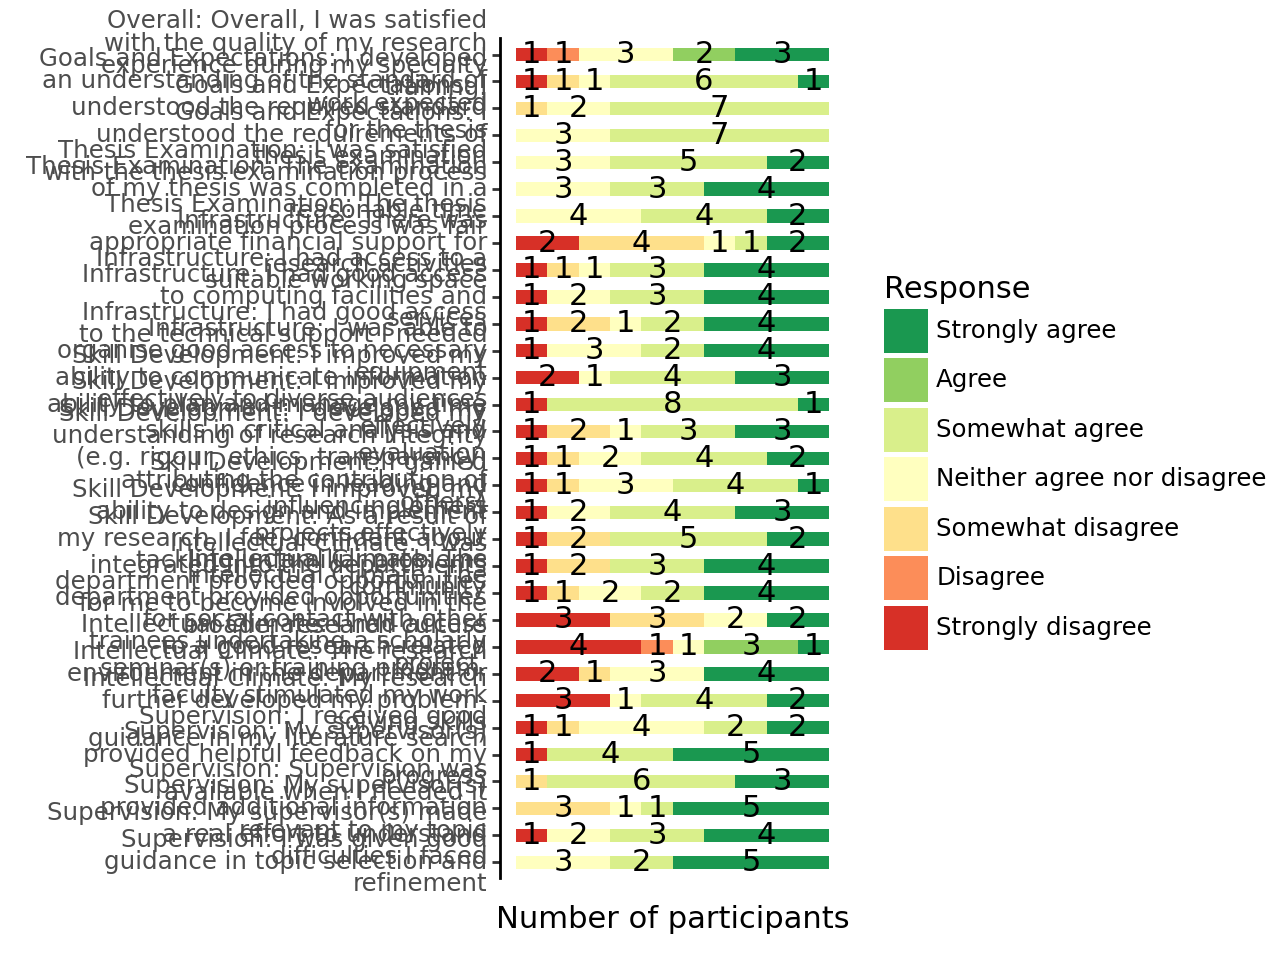

<Figure Size: (640 x 480)>

In [95]:
import textwrap
def wraping_func(text):
    return [textwrap.fill(wraped_text, 35) for wraped_text in text]

heatmap_section2 = (ggplot(df_section2plot_heat,
                        p9.aes(x="DomQuestion",
                            y="Number of participants",
                            fill='Response'))
                
            
        + p9.geom_bar(stat = "identity",
        width = 0.5)
        
        
         #heading    
     + p9.labs(title='',
     x = "") 
     
     + p9.theme_classic() #blank background and gridlines
     
     #fill colour
     + p9.scale_fill_manual(values=list(reversed(["#d73027", "#fc8d59", "#fee08b", "#ffffbf", "#d9ef8b", "#91cf60", "#1a9850"])))
                                               
     
     #add annotations
     + p9.geom_text(p9.aes(label = "Number of participants"),
     position = position_stack(vjust = 0.5)
     )     
     
     #facet wrap x labels
     #https://stackoverflow.com/questions/65891398/plotnine-wrap-text-in-facet-wrap
     + scale_x_discrete(limits= rowOrder.DomQuestion.tolist(),
                        #df_section2plot_heat['DomQuestion'].unique().tolist(), 
                        labels=wraping_func)
    
     + p9.theme(legend_position = 'right', #remove the legend
                panel_grid_major= p9.element_blank(),
                panel_border=p9.element_blank(),
                panel_background=p9.element_blank(), 
                #axis_text_y=p9.element_blank(),
                axis_ticks_major_x=p9.element_blank(),              
                axis_text_x= p9.element_blank(), #remove x axis labels
                axis_line_x = p9.element_blank()                
                          
                ) 


        + coord_flip()
     
        
        )


        


plotName = "Results/Section2/PREQ_ordered.png"

w = 10
h = 15

#p9.ggsave(heatmap_section2,plotName, width=10, height= 20, dpi=300, limitsize=False)


display(heatmap_section2)


#heatmap

## Compare to rest of the participants

In [96]:
#get list of columns that are Q19
r = re.compile("^Q19_\d*$")

newlist = list(filter(r.match, headings)) # Read Note below

#add Q10_2 & Q10_6 as it was part of PREQ but added to the main survey
newlist = ["Q10_2", "Q10_4"] + newlist

#add Q3 to the list and Q
cols = ["Q3_1","Q3_2", "Q12", "Q14c", "Q16"]  + newlist

#get df with just Q19 (section 2) of the survey
df_section2_all = df.loc[:, cols]

df_section2_all.head()


df_section2_did = df_section2_all.dropna(subset=newlist)

#df_section2_did

In [97]:
#find the difference between those that did PREQ and did not
df_section2_NotDone = pd.concat([df_section2_did, df_section2_all]) #merge dfs
df_section2_NotDone.reset_index(inplace = True) #reset index
df_section2_NotDone = df_section2_NotDone.drop_duplicates(subset= ["index"], keep=False) #remove the same index

#add column to say that the PREQ was not done
df_section2_NotDone["PREQ"] = "No" 


#add column to say that the PREQ was done
df_section2_did["PREQ"] = "Yes"

#df_section2_NotDone

C:\Users\s2997324\AppData\Local\Temp\ipykernel_21108\1958221792.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [98]:
df_section2_compare = pd.concat([df_section2_did, df_section2_NotDone]) #merge dfs

#df_section2_compare

In [99]:
#SUPPORT OF PROJECTS 

#count the numbers for each categofy (supportive or not to projects)
df_section2_compareCounts = df_section2_compare.groupby(["PREQ", "Q12"])['Q12'].count().to_frame()

#make into df
df_section2_compareCounts.columns = ["Count"] #change column name
df_section2_compareCounts.reset_index(inplace=True) #reset index

df_section2_compareCounts


#Chi Sq test: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
#pivot table

df_section2_compareCountsPiv = pd.pivot(df_section2_compareCounts, index='PREQ', columns='Q12', values='Count')


from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df_section2_compareCountsPiv)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
 

p value is 0.3765605674900486
Independent (H0 holds true)


In [100]:
#OVERALL EXPERIENCE

#count the numbers for each categofy (supportive or not to projects)
df_section2_compareCounts = df_section2_compare.groupby(["PREQ", "Q10_4"])['Q10_4'].count().to_frame()

#make into df
df_section2_compareCounts.columns = ["Count"] #change column name
df_section2_compareCounts.reset_index(inplace=True) #reset index

df_section2_compareCounts


#Chi Sq test: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
#pivot table

df_section2_compareCountsPiv = pd.pivot(df_section2_compareCounts, index='PREQ', columns='Q10_4', values='Count')


from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df_section2_compareCountsPiv)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
 

p value is 0.7812502164465163
Independent (H0 holds true)


In [101]:
#INTERVIEWED 

#OVERALL EXPERIENCE

#count the numbers for each categofy (supportive or not to projects)
df_section2_compareCounts = df_section2_compare.groupby(["PREQ", "Q16"])['Q16'].count().to_frame()

#make into df
df_section2_compareCounts.columns = ["Count"] #change column name
df_section2_compareCounts.reset_index(inplace=True) #reset index

df_section2_compareCounts


#Chi Sq test: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
#pivot table

df_section2_compareCountsPiv = pd.pivot(df_section2_compareCounts, index='PREQ', columns='Q16', values='Count')


from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df_section2_compareCountsPiv)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.018581568303334704
Dependent (reject H0)


# Analysis of Section 3 of the survey data

In [102]:
#get list of columns that are Q19
r = re.compile("^Q20_\d*$")

newlist = list(filter(r.match, headings)) # Read Note below


#add Q3 to the list
cols = ["Q3_1","Q3_2", "Q12", "Q14c", "Q16"] + newlist

#get df with just Q19 (section 2) of the survey
df_section3 = df.loc[:, cols]

#remove rows where they havent answered the question
df_section3 = df_section3.dropna(subset=newlist)


#df_section3


In [103]:
#get college names represented in data set
df_section3colleges = df_section2[["Q3_1", "Q3_2"]]

df_section3colleges = pd.DataFrame(df_section3colleges.groupby(["Q3_1", "Q3_2"]).size()) #count number represented

df_section3colleges.reset_index(inplace=True)

df_section3colleges.columns = ["College", 'Subspecialty','Number of participants']#rename column


#save results
#df_section3colleges.to_csv("Results/Section3/WReN Spider_Participants_by_collegeSubspeciality.csv", index=False)


#df_section3colleges

In [104]:
# Created stacked bar plot
#https://www.geeksforgeeks.org/how-to-create-a-stacked-bar-plot-in-seaborn/
#https://saturncloud.io/blog/legend-outside-the-plot-in-python-matplotlib/#:~:text=To%20move%20the%20legend%20outside,parameters%20of%20the%20legend%20function.&text=The%20bbox_to_anchor%20parameter%20specifies%20the,legend%27s%20anchor%20point%20should%20be.

#get df with just Q19 (section 2) of the survey
df_section3plot = df_section3.loc[:, newlist]

#give new index
df_section3plot = df_section3plot.reset_index()

#df_section3plot

In [105]:
#go from wide to long

df_section3plot_long = pd.melt(df_section3plot, id_vars='index', value_vars=newlist)

#df_section3plot_long

In [106]:
#create cross tab with questions as the columns and counts
df_section3plot_cross = pd.DataFrame(pd.crosstab(df_section3plot_long.variable, df_section3plot_long.value))

#rename columns to questions
questionNames = {'Q20_1':"Writing a research protocol",
'Q20_2':"Using qualitative research methods", 
'Q20_3':"Publishing research", 
'Q20_4': "Writing and presenting a research report",
'Q20_5': "Analysing and interpreting results",
'Q20_6': "Using quantitative research methods",
'Q20_7': "Critically reviewing the literature",
'Q20_8': "Finding relevant literature",
'Q20_9': "Generating research ideas",
'Q20_10': "Applying for research funding",

}


df_section3plot_cross = df_section3plot_cross.rename(index=questionNames)

#reorder columns
order = ["No experience",
    "Little experience",
"Some experience",
"Moderately experienced",
"Very experienced"]

#df_section3plot_cross = df_section3plot_cross[order]

#df_section3plot_cross


## Plot the results

In [107]:
#df_section3plot_long.head()

In [108]:
#rename the questions

#create dictionary
questionNames = {'Q20_1':"Writing a research protocol",
'Q20_2':"Using qualitative research methods", 
'Q20_3':"Publishing research", 
'Q20_4': "Writing and presenting a research report",
'Q20_5': "Analysing and interpreting results",
'Q20_6': "Using quantitative research methods",
'Q20_7': "Critically reviewing the literature",
'Q20_8': "Finding relevant literature",
'Q20_9': "Generating research ideas",
'Q20_10': "Applying for research funding",
}


#rename questions
df_section3plot_long['Question'] = df_section3plot_long['variable'].map(questionNames)


#rename column
df_section3plot_long.rename(columns = {'value':'Response'}, inplace = True)

#df_section3plot_long.head()

In [109]:
#create order for responses
responseOrder = list(reversed(["No experience",
    "Little experience",
"Some experience",
"Moderately experienced",
"Very experienced"]))

df_section3plot_long['Response'] = pd.Categorical(df_section3plot_long['Response'], categories=responseOrder, ordered=True)

In [110]:
df_section3plot_heat = df_section3plot_long[["Question","Response"]]



df_section3plot_heat = df_section3plot_heat.groupby(["Question", "Response"])['Response'].count().to_frame()


df_section3plot_heat = df_section3plot_heat.rename(columns={'Response': 'Number of participants'})
df_section3plot_heat.reset_index(inplace=True)

#df_section3plot_heat.head()

In [111]:
#remove zero values
df_section3plot_heat = df_section3plot_heat[df_section3plot_heat["Number of participants"] >0]

df_section3plot_heat["Number of participants"].unique()

array([2, 3, 4, 1, 5, 6], dtype=int64)

In [112]:
#create order for questions
domOrder = [
       'Generating research ideas',
           'Critically reviewing the literature',
       'Finding relevant literature', 
    'Writing a research protocol',
           'Applying for research funding',
        'Using qualitative research methods',
       'Using quantitative research methods',    
    'Analysing and interpreting results',
           'Writing and presenting a research report', 
       'Publishing research'
]

domOrder.reverse()


df_section3plot_heat.Question = pd.Categorical(df_section3plot_heat.Question, categories=domOrder, ordered=True)


#df_section3plot_heat

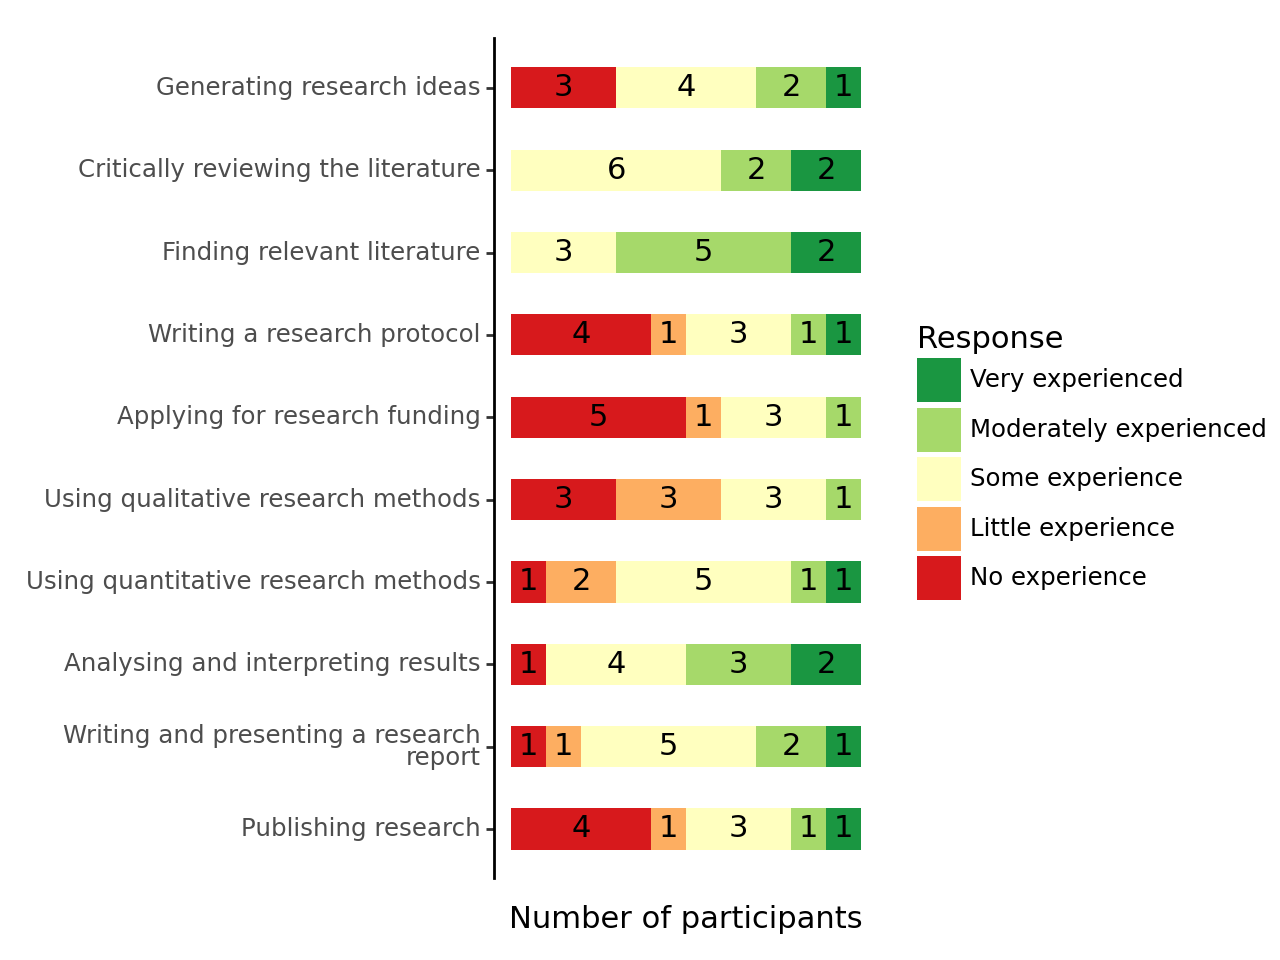

<Figure Size: (640 x 480)>

In [113]:
import textwrap
def wraping_func(text):
    return [textwrap.fill(wraped_text, 35) for wraped_text in text]






heatmap_section3 = (ggplot(df_section3plot_heat,
                        p9.aes(x="Question",
                            y="Number of participants",
                            fill='Response'))
                
            
        + p9.geom_bar(stat = "identity",
        width = 0.5)
        
        
         #heading    
     + p9.labs(title='',
     x = "") 
     
     + p9.theme_classic() #blank background and gridlines
     
     #fill colour
     + p9.scale_fill_manual(values=list(reversed(["#d7191c", "#fdae61", "#ffffbf", "#a6d96a", "#1a9641"])))
                                               
     
     #add annotations
     + p9.geom_text(p9.aes(label = "Number of participants"),
     position = position_stack(vjust = 0.5)
     )     

     
     
     #facet wrap x labels
     #https://stackoverflow.com/questions/65891398/plotnine-wrap-text-in-facet-wrap
     + scale_x_discrete(breaks=df_section3plot_heat['Question'].unique().tolist(), labels=wraping_func)
    
     + p9.theme(legend_position = 'right', #remove the legend
                panel_grid_major= p9.element_blank(),
                panel_border=p9.element_blank(),
                panel_background=p9.element_blank(), 
                #axis_text_y=p9.element_blank(),
                axis_ticks_major_x=p9.element_blank(),              
                axis_text_x= p9.element_blank(), #remove x axis labels
                axis_line_x = p9.element_blank()                
                          
                ) 


        + coord_flip()
     
        
        )


        
#print(heatmap)

plotName = "Results/Section3/WReN Spider_ordered.png"



#p9.ggsave(heatmap_section3,plotName, width=10, height= 5, dpi=300, limitsize=False)

heatmap_section3

# Compare those who offered to do an interview with rest of the cohort

In [114]:
df_interview = df.copy()

df_interview['Q16'] = df_interview['Q16'].fillna('No')

df_interview['Q16'].value_counts()

No     338
Yes     33
Name: Q16, dtype: int64

In [115]:
#INTERVIEWED v SUPPORT OF RESEARCH PROJECT

#count the numbers for each categofy (supportive or not to projects)
df_interviewed_compareCounts = df_interview.groupby(["Q16", "Q12"])['Q12'].count().to_frame()


#make into df
df_interviewed_compareCounts.columns = ["Count"] #change column name
df_interviewed_compareCounts.reset_index(inplace=True) #reset index

df_interviewed_compareCounts


#Chi Sq test: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
#pivot table

df_interviewed_compareCountsPiv = pd.pivot(df_interviewed_compareCounts, index='Q16', columns='Q12', values='Count')


from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df_interviewed_compareCountsPiv)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0), interviewed more likley to support projects')
else:
    print('Independent (H0 holds true), interviewed NOT more likley to support projects')
    

print ("***************************")

df_interviewed_compareCounts

p value is 4.798856048842197e-06
Dependent (reject H0), interviewed more likley to support projects
***************************


,Q16,Q12,Count
0,No,Moderately oppose,50
1,No,Moderately support,67
2,No,Neither support nor oppose,45
3,No,Strongly oppose,34
4,No,Strongly support,17
5,Yes,Moderately oppose,8
6,Yes,Moderately support,9
7,Yes,Neither support nor oppose,2
8,Yes,Strongly oppose,1
9,Yes,Strongly support,13


In [116]:
df[ "Q10_4"].value_counts()

Agree                         17
Neither agree nor disagree    17
Disagree                      15
Strongly agree                13
Strongly disagree              6
Name: Q10_4, dtype: int64

In [117]:
#INTERVIEWED v OVERALL SATISFACTION WITH RESEARCH EXPERIENCE

#count the numbers for each categofy (supportive or not to projects)
df_interviewed_compareCounts = df_interview.groupby(["Q16", "Q10_4"])['Q10_4'].count().to_frame()


#make into df
df_interviewed_compareCounts.columns = ["Count"] #change column name
df_interviewed_compareCounts.reset_index(inplace=True) #reset index

df_interviewed_compareCounts


#Chi Sq test: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
#pivot table

df_interviewed_compareCountsPiv = pd.pivot(df_interviewed_compareCounts, index='Q16', columns='Q10_4', values='Count')


from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df_interviewed_compareCountsPiv)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0), interviewed more likley to be satisfied')
else:
    print('Independent (H0 holds true), interviewed NOT more likley to be satisfied')
    
print ("***************************")

df_interviewed_compareCounts

p value is 0.3064491953213277
Independent (H0 holds true), interviewed NOT more likley to be satisfied
***************************


,Q16,Q10_4,Count
0,No,Agree,6
1,No,Disagree,9
2,No,Neither agree nor disagree,9
3,No,Strongly agree,6
4,No,Strongly disagree,5
5,Yes,Agree,11
6,Yes,Disagree,6
7,Yes,Neither agree nor disagree,8
8,Yes,Strongly agree,7
9,Yes,Strongly disagree,1


# Get all dependencies

In [118]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

requirements

[('matplotlib', '3.7.1'),
 ('numpy', '1.24.3'),
 ('pandas', '1.5.3'),
 ('plotnine', '0.12.1'),
 ('regex', '2022.7.9'),
 ('seaborn', '0.13.2')]